## Cellular Automata Traffic- MOTORWAY MADNESS II - Logbook 3  ##

### Triple Lane System ###

In [4]:
import numpy as np                                  #imports
import matplotlib.pyplot as plt

### 23/2 ###
<br>
The next step is to extend the programme to contain different mixtures of vehicles-  that is some cars that can move faster than others, this is governed by the vmax values of each vehicle.<br>
<br>
Initialiy I was going to choose to do this by coupling a array with the current arrays. This array would indicate the type of vehicle and thus the vmax of the vehicle. As the vehicle moved along the array on the original road this indicator value would move along this other array. However before trying that I thought I would try to see of this could be done without the need for another array but using a complex number that would not be affected by these rules, but would stay with the vehicle and determine its type. <br>
I would give the slower "lorry" vehicles a complex part of -1j and a max speed of 3. The fast "motorbike" vehicles a complex part of 1j, and a max speed of 7, and the cars would have no complex part and a max speed of 5- these can be changed later- the speeds are parameters in the function that can be changed at any time.<br>
<br>
All seemed to work fine in my test to see if the function would break down upon introdction of the complex parts. However when it came to looking at the output, by setting the motorbike and lorry figures to the same colour as the background one would expect to see a large drop in the number of vehicles, however this did not happen, meaning the vehicles lost their complex part somewhere.<br>
<br>
Another flaw I found while trying to fix the error was in the gernation of these vehicles, by the nature of porabilities, the true probabilities would not match up to the input probabilites using this:<br>
<br>
    for j in range(2): <br>
        for i in range(round(n*density)): <br>
            ranspace = np.random.randint(0, n) <br>
            while dualroad[j,ranspace]!=0: <br>
                ranspace = np.random.randint(0, n) <br>
            if np.random.randint(1, 100)<percent_lorries*100:   <br>
                dualroad[j, ranspace]=np.random.randint(2, vmax_lorries) -1j <br>
            elif np.random.randint(1, 100)<percent_bikes*200: <br>
                dualroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j <br>
            else: <br>
                dualroad[j, ranspace]=np.random.randint(2, vmax_cars) <br>
                <br>

Thus the probability of generatio should look like this:

if np.random.randint(1, 100)<percent_lorries*100:   <br>
                dualroad[j, ranspace]=np.random.randint(2, vmax_lorries) -1j <br>
            elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes: <br>
                dualroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j <br>
            else: <br>
                dualroad[j, ranspace]=np.random.randint(2, vmax_cars) <br>
                <br>


When printing the elements of the array we can see that the compelex part disappears after a number of iterations, confirming that there is some flaw. Output:<br>
<br>
1 [0j, 0j, 0j, 0j, (3+1j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (4-1j)]<br>
1 [0j, 0j, 0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, (4+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
2 [0j, 0j, (5-1j), 0j, 0j, 0j, (4+1j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, (5+0j), 0j, 0j, 0j, 0j, 0j]<br>
2 [0j, 0j, 0j, 0j, 0j, 0j, 0j, (2+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
3 [0j, 0j, 0j, (3+0j), 0j, 0j, 0j, 0j, 0j, (5+1j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (6+0j), 0j]<br>
3 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (3+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
4 [0j, (5+0j), 0j, 0j, 0j, (4+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, (6+1j), 0j, 0j, 0j, 0j, 0j, 0j]<br>
4 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (4+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
5 [0j, 0j, 0j, (4+0j), 0j, 0j, 0j, 0j, (5+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (6+1j), 0j, 0j]<br>
5 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (5+0j), 0j, 0j, 0j, 0j, 0j, 0j]<br>
6 [0j, (6+1j), 0j, 0j, 0j, 0j, (5+0j), 0j, 0j, 0j, 0j, 0j, (6+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
6 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (6+0j), 0j, 0j]<br>
7 [0j, 0j, 0j, 0j, 0j, (6+0j), 0j, 0j, 0j, 0j, (6+0j), 0j, 0j, 0j, 0j, 0j, (6+0j), 0j, 0j, 0j]<br>
7 [0j, (6+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
8 [(6+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, (5+0j), 0j, 0j, 0j, 0j, 0j, (6+0j), 0j, 0j, 0j, 0j, 0j]<br>
8 [0j, 0j, 0j, 0j, 0j, (6+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>

<br>
From inspection it is the second rule that is losing this complex part, as seen by this, with the number printed between being what the complex part should be:<br>
11 [0j, 0j, 0j, 0j, 0j, (6-1j), 0j, 0j, (2+0j), 0j, 0j, (3+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, (6-1j)]<br>
11 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>

12 [0j, 0j, 0j, (6-1j), 0j, (2+0j), 0j, 0j, 0j, (3+0j), 0j, 0j, 0j, (4+0j), 0j, 0j, 0j, 0j, 0j, 0j]<br>
12 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>

13 [0j, 0j, 0j, (2+0j), 0j, 0j, (3+0j), 0j, 0j, 0j, 0j, (4+0j), 0j, 0j, 0j, 0j, (5+0j), 0j, 0j, 0j]<br>
13 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
<br>
In order to overcome this, when iterating over each space in the road, the complex number is stored, and simply added back on whenever a function rewrites the value of velocity as opposed to simply adding or subtracting one.<br>
<br>
However this still didnt seem to be stay with the vehicle and it was simply becuase the function number.imag gives the imaginary part without j, and thus the complex part that is added on to maintain the complex number needs to be multiplied by j. Also when determining max velocities or the visualistaion matrix number.imag == 1 rather than matrix number.imag == 1j is required, and this solves the problem of the different vehcicles not showing up in the final output.<br>
<br>
In order to be able to see which vehicles were which, I removed the different colours that depended on which lane the vehicle was in- this can be altered with time. And the colour of the vehicle indicates what type of vehicle we have. In the future I could visibly show the different sizes of the vehicles with the lorries being 3 squares, cars two and bikes one for example.

In [ ]:
def dual_lane_road_periodic(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    dualroad = np.zeros((2,n), dtype = complex)                         
    matrix = np.zeros((3*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    iterations = 1
    
    ### Car Generation ###
    for j in range(2):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while dualroad[j,ranspace]!=0:
                ranspace = np.random.randint(0, n)
            if np.random.randint(1, 100)<percent_lorries*100:  
                dualroad[j, ranspace]=np.random.randint(2, vmax_lorries) -1j
            elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes*100:
                dualroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j
            else:
                dualroad[j, ranspace]=np.random.randint(2, vmax_cars)
               
    while iterations in range(max_iterations):
        
        #create loop like extention to the end of the road
        leftlane = np.concatenate((dualroad[0,], dualroad[0,]))
        rightlane = np.concatenate((dualroad[1,], dualroad[1,]))


        for i in range(n-vmax_lorries, -1, -1):
            
            #setting the max speed depending on vehicle type
            if leftlane[i].imag == -1:
                vmax = vmax_lorries
            elif leftlane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
                
            #for the right lane
            if rightlane[i].imag == -1:
                vmax = vmax_lorries
            elif rightlane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
            
            
            ### Overtaking ###
        
            #cars in the left lane:
            if leftlane[i].real>1:
                #space in the other lane for it to move forward into
                if rightlane[i].real==0:
                    # are there cars in front?
                    if sum(leftlane[i+1:i+int(leftlane[i].real)].real)!=0:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while leftlane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  leftlane[i].real>count: 
                            #if the speed of the car is greater than the car ahead
                            if leftlane[i].real>leftlane[i + count+1].real: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the other lane wont have to slow down
                                    count2 = 0 
                                    while rightlane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if rightlane[[i - count2-1]].real<count:
                        
                                        #ensuring the car won't have to slow down in the other lane
                                        count3 = 0 
                                        while rightlane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  leftlane[i].real<count3:
                                            #move into the other lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                        
                                        #if the cars that are in front are faster
                                        elif leftlane[i].real<rightlane[i + count3+1].real:
     
                                            #move into the other lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
    
            ### Moving to the slower lane ###
    
            #cars in the right lane:
            if rightlane[i].real>1:
                #space in the other lane for it to move forward into
                if leftlane[i].real==0:
            
                    #if cars in the other lane ahead are traveling at the same speed or faster
                    count4=0 
                    while leftlane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  rightlane[i].real<=count4:
                    
                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, rightlane[i])                                          
                                                                  
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down
                    elif 2*rightlane[i].real<=leftlane[i + count4+1].real:

                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, rightlane[i])                                          
                                             
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
        
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        dualroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        dualroad[1,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))
        
        for j in range(2):
            
            ##create loop like extention to the end of the road
            road = np.concatenate((dualroad[j,], dualroad[j,]))
            
            ### Rule 1 ###
        
            #iterate along the road
            for i in range(2*n-vmax_bikes,  -1, -1):
                
                #save the complex part to add on when any changes to the velocity are made
                comp = road[i].imag*1j
                
                
                #setting the max speed depending on vehicle type
                if road[i].imag == -1:
                    vmax = vmax_lorries
                elif road[i].imag == 1:
                    vmax = vmax_bikes
                else:
                    vmax = vmax_cars
                
                
                # If the velocity v of the car is lower than vmax , and the distance to the next car
                # ahead is larger than v + 1, the speed is increased by one.
                if road[i].real>0: 
                    #if there are no cars in front
                    if sum(road[i+1:i+int(road[i].real)].real)==0:
                        if road[i].real<vmax:
                            road[i]+=1
            
            
                    ### Rule 2###
                
                    # If a driver at site i sees the next vehicle at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        #If there is a car directly in front slow to stationary.
                        if road[i+1].real!=0:
                            road[i]=1 + comp
                        else:
                            while road[i + int(count5.real)].real<1:
                                 #Count is the distance between two cars.
                                count5+=1
                            road[i]=count5 + comp
            ### Rule 4 ###
        
            # Each vehicle is advanced by v sites.
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-8, -1, -1): 

                #cars move forward 
                if road[i].real>0:                       
                    road= np.insert(road, i+int(road[i].real)-1, road[i])       
                    road = np.delete(road, i)
                
        
            #reduce the road back to the original shape
            dualroad[j,] = np.concatenate((road[n:n+int(n/2)], road[int(n/2):n]))
        
            ###Rule 3 ###
                
            # The velocity of each moving vehicle is decreased by one with probability p.
            for i in range(n):
                if np.random.randint(1, 100)<prob_car_daw*100:       
                    if dualroad[j, i].real>1:                                     
                        dualroad[j, i]-=1
                        
                        
       
        #Visualisation
        for j in range(2):
            for i in range(n):
                if dualroad[j, i]==0:
                    matrix[3*(iterations-1) +j,i]= 15 
                elif dualroad[j, i].imag == -1:
                    matrix[3*(iterations-1) +j,i]= -50 #-30*j
                elif dualroad[j, i].imag == 1:
                    matrix[3*(iterations-1) +j,i]= 50 #-30*j
                else:
                    matrix[3*(iterations-1) +j,i]= -20 #+30*j
                    
                    
       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
                #if dualroad[j,i]==0:
            #    street.append(dualroad[j,i])
            #    else:
            #        street.append(dualroad[j,i]-1)
            #print(iterations, street)
        
            
            ### Data collection ###
        
            data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)
 
        
        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)
        
        #print("")
        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('3 x Time step')
    ax11.set_title("Visual Repsresentation of One Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix) 
             
  

In [ ]:
#dual_lane_road_periodic(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, max_iterations)
dual_lane_road_periodic(100, 4, 6, 8, 15/100, 0.3, 0.3, 2/100, 100)

### 24/2 ###

It then made sense to move this to a 3 lane simulation so that there was more scope for overatking, and to see if the lanes segregate themselves into fast, medium and slow. This all worked fine with the implenetation of a middle lane where cars can move into either lane.

However due to the nature of the rules implemented for moving lanes, the cars are only incentivised to overtake if they are moving faster than the vehicle they are behind, regardless of their max speed, and thus if they are behind a vehicle and are travelling slower they will never look to overake it. Thus the rules of overtaking needed to be rethought.

The most obvious option is for the car to look to overtake if it is travelling slower than its max speed to allow it to accelerate, and do this regardless of whether it is travelling faster than the vehicle in front of it. (And possibly increase its speed as it does so, to simulate it accelerating as it moves into the other lane). This would stimulate a driver in a fast car stuck behind one that is traveling slowly, (but still faster than the original vehicle in question, as the driver cant accalerate while in this lane), he moves into the next to enable the ability to accerate and everntually do so until its max speed is reached.

When looking at the output we dont quite see complete lane segregation into fast, medium and slow lanes, however what we do see is that none or few of the yellow motorbikes seem to be trapped in by other cars, and thus are their average speed will be higher than the other vehicle types, and similarly the dark purple lorries do not overake many other vehicles. However any lorries that are generated in the faster lanes seem to stay there as they dont have the opportunity to move into the slower lanes when the density of the road is relatively high.

This can be solved by not generating the slower moving vehicles in these lans- and thus we assign that lorries cannot be generated unless j<2, where j is the lane number from left to right.

In [36]:
def triple_lane_road_periodic(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    tripleroad = np.zeros((3,n), dtype = complex)                         
    matrix = np.zeros((4*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    iterations = 1
    
    ### Car Generation ###
    for j in range(3):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while tripleroad[j,ranspace]!=0:
                ranspace = np.random.randint(0, n)
            if np.random.randint(1, 100)<percent_lorries*100 and j<2:  
                tripleroad[j, ranspace]=np.random.randint(2, vmax_lorries) -1j
            elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes*100:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j
            else:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_cars)
               
    while iterations in range(max_iterations):
        
        #create loop like extention to the end of the road
        leftlane = np.concatenate((tripleroad[0,], tripleroad[0,]))
        middlelane = np.concatenate((tripleroad[1,], tripleroad[1,]))
        rightlane = np.concatenate((tripleroad[2,], tripleroad[2,]))

        for i in range(n-vmax_bikes, -1, -1):
            
            #setting the max speed depending on vehicle type
            if leftlane[i].imag == -1:
                vmax = vmax_lorries
            elif leftlane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
                
            #for the middle lane
            if middlelane[i].imag == -1:
                vmax = vmax_lorries
            elif middlelane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
                
            #for the right lane
            if rightlane[i].imag == -1:
                vmax = vmax_lorries
            elif rightlane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
            
            
            ### Overtaking ###
        
            #cars in the left lane:
            if leftlane[i].real>1:
                #space in the middle lane for it to move forward into
                if middlelane[i].real==0:
                    # are there cars in front?
                    if sum(leftlane[i+1:i+int(leftlane[i].real)].real)!=0:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while leftlane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  leftlane[i].real>count: 
                            #if the speed of the car is slowe than its max
                            if leftlane[i].real< vmax: #leftlane[i + count+1].real: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the middle lane wont have to slow down
                                    count2 = 0 
                                    while middlelane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if middlelane[[i - count2-1]].real<count2:
                        
                                        #ensuring the car won't have to slow down in the middle lane
                                        count3 = 0 
                                        while middlelane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                            
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  leftlane[i].real<count3:
                                            leftlane[i]+=1
                                            #move into the middle lane
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                                            
                                            if middlelane[i]<vmax:
                                                middlelane[i]+=1
                        
                                        #if the cars that are in front are faster
                                        elif leftlane[i].real<middlelane[i + count3+1].real:
                                            #move into the middle lane
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                                            
                                            if middlelane[i]<vmax:
                                                middlelane[i]+=1
    
            ### Moving to the slower lane ###
    
            #cars in the right lane:
            if rightlane[i].real>1:
                #space in the middle lane for it to move forward into
                if middlelane[i].real==0:
            
                    #if cars in the middle lane ahead are traveling at the same speed or faster
                    count4=0 
                    while middlelane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  rightlane[i].real<=count4:
                    
                        #move into the middle lane
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, rightlane[i])                                          
                                                                  
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down
                    elif 2*rightlane[i].real<=middlelane[i + count4+1].real:

                        #move into the middle lane
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, rightlane[i])                                          
                                             
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                        
            ### cars in the middle lane can overtake or go into the slower lane
            ### Overtaking ###
        
            #cars in the middle lane:
            if middlelane[i].real>1:
                #space in the right lane for it to move forward into
                if rightlane[i].real==0:
                    # are there cars in front?
                    if sum(middlelane[i+1:i+int(middlelane[i].real)].real)!=0:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while middlelane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  middlelane[i].real>count: 
                            #if the speed of the car is slower than it's max
                            if middlelane[i].real< vmax: #middlelane[i + count+1].real: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the right lane wont have to slow down
                                    count2 = 0 
                                    while rightlane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if rightlane[[i - count2-1]].real<count2:
                                        #ensuring the car won't have to slow down in the right lane
                                        count3 = 0 
                                        while rightlane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  middlelane[i].real<count3:
                                            #move into the right lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, middlelane[i])
                                                                  
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, 0)
                                            
                                            if rightlane[i]<vmax:
                                                rightlane[i]+=1
                        
                                        #if the cars that are in front are faster
                                        elif middlelane[i].real<rightlane[i + count3+1].real:
     
                                            #move into the right lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, middlelane[i])
                                                                  
                                            middlelane = np.delete(middlelane, i)
                                            middleane = np.insert(middlelane, i, 0)
                            
                                            if rightlane[i]<vmax:
                                                rightlane[i]+=1
    
            ### Moving to the slower lane ###
    
            #cars in the middle lane:
            if middlelane[i].real>1:
                #space in the left lane for it to move forward into
                if leftlane[i].real==0:
            
                    #if cars in the left lane ahead are traveling at the same speed or faster
                    count4=0 
                    while leftlane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  middlelane[i].real<=count4:
                    
                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, middlelane[i])                                          
                                                                  
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, 0)
            
        
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        tripleroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        tripleroad[1,] = np.concatenate((middlelane[n:n+int(n/2)], middlelane[int(n/2):n]))
        tripleroad[2,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))
        
        for j in range(3):
            
            ##create loop like extention to the end of the road
            road = np.concatenate((tripleroad[j,], tripleroad[j,]))
                   
            #iterate along the road
            for i in range(2*n-vmax_bikes,  -1, -1):
                
                #save the complex part to add on when any changes to the velocity are made
                comp = road[i].imag*1j
                
                
                #setting the max speed depending on vehicle type
                if road[i].imag == -1:
                    vmax = vmax_lorries
                elif road[i].imag == 1:
                    vmax = vmax_bikes
                else:
                    vmax = vmax_cars
                
                
                ### Rule 1 ###
                # If the velocity v of the car is lower than vmax , and the distance to the next car
                # ahead is larger than v + 1, the speed is increased by one.
                if road[i].real>0: 
                    #if there are no cars in front
                    if sum(road[i+1:i+int(road[i].real)].real)==0:
                        if road[i].real<vmax:
                            road[i]+=1
            
            
                    ### Rule 2###
                
                    # If a driver at site i sees the next vehicle at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        #If there is a car directly in front slow to stationary.
                        if road[i+1].real!=0:
                            road[i]=1 + comp
                        else:
                            while road[i + int(count5.real)].real<1:
                                 #Count is the distance between two cars.
                                count5+=1
                            road[i]=count5 + comp
            ### Rule 4 ###
        
            # Each vehicle is advanced by v sites.
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-vmax_bikes, -1, -1): 

                #cars move forward 
                if road[i].real>0:                       
                    road= np.insert(road, i+int(road[i].real)-1, road[i])       
                    road = np.delete(road, i)
                
        
            #reduce the road back to the original shape
            tripleroad[j,] = np.concatenate((road[n:n+int(n/2)], road[int(n/2):n]))

            ###Rule 3 ###
                
            # The velocity of each moving vehicle is decreased by one with probability p.
            for i in range(n):
                if np.random.randint(1, 100)<prob_car_daw*100:       
                    if tripleroad[j, i].real>1:                                     
                        tripleroad[j, i]-=1
                        
                        
       
        #Visualisation
        for j in range(3):
            for i in range(n):
                if tripleroad[j, i]==0:
                    matrix[4*(iterations-1) +j,i]= 15+3*j 
                elif tripleroad[j, i].imag == -1:
                    matrix[4*(iterations-1) +j,i]= -50 #-30*j
                elif tripleroad[j, i].imag == 1:
                    matrix[4*(iterations-1) +j,i]= 50 #-30*j
                else:
                    matrix[4*(iterations-1) +j,i]= -20 #+30*j
                    
                    
       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
                #if tripleroad[j,i]==0:
            #    street.append(tripleroad[j,i])
            #    else:
            #        street.append(tripleroad[j,i]-1)
            #print(iterations, street)
        
            
            ### Data collection ###
        
            #data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)
 
        
        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)
        
        #print("")
        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road', fontsize=30)
    ax11.set_ylabel('4 x Time step', fontsize=30)
    ax11.set_title("Visual Repsresentation of Three Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%.".format(density, max_iterations, prob_car_daw), fontsize=12)
    ax11.imshow (matrix) 
             
  

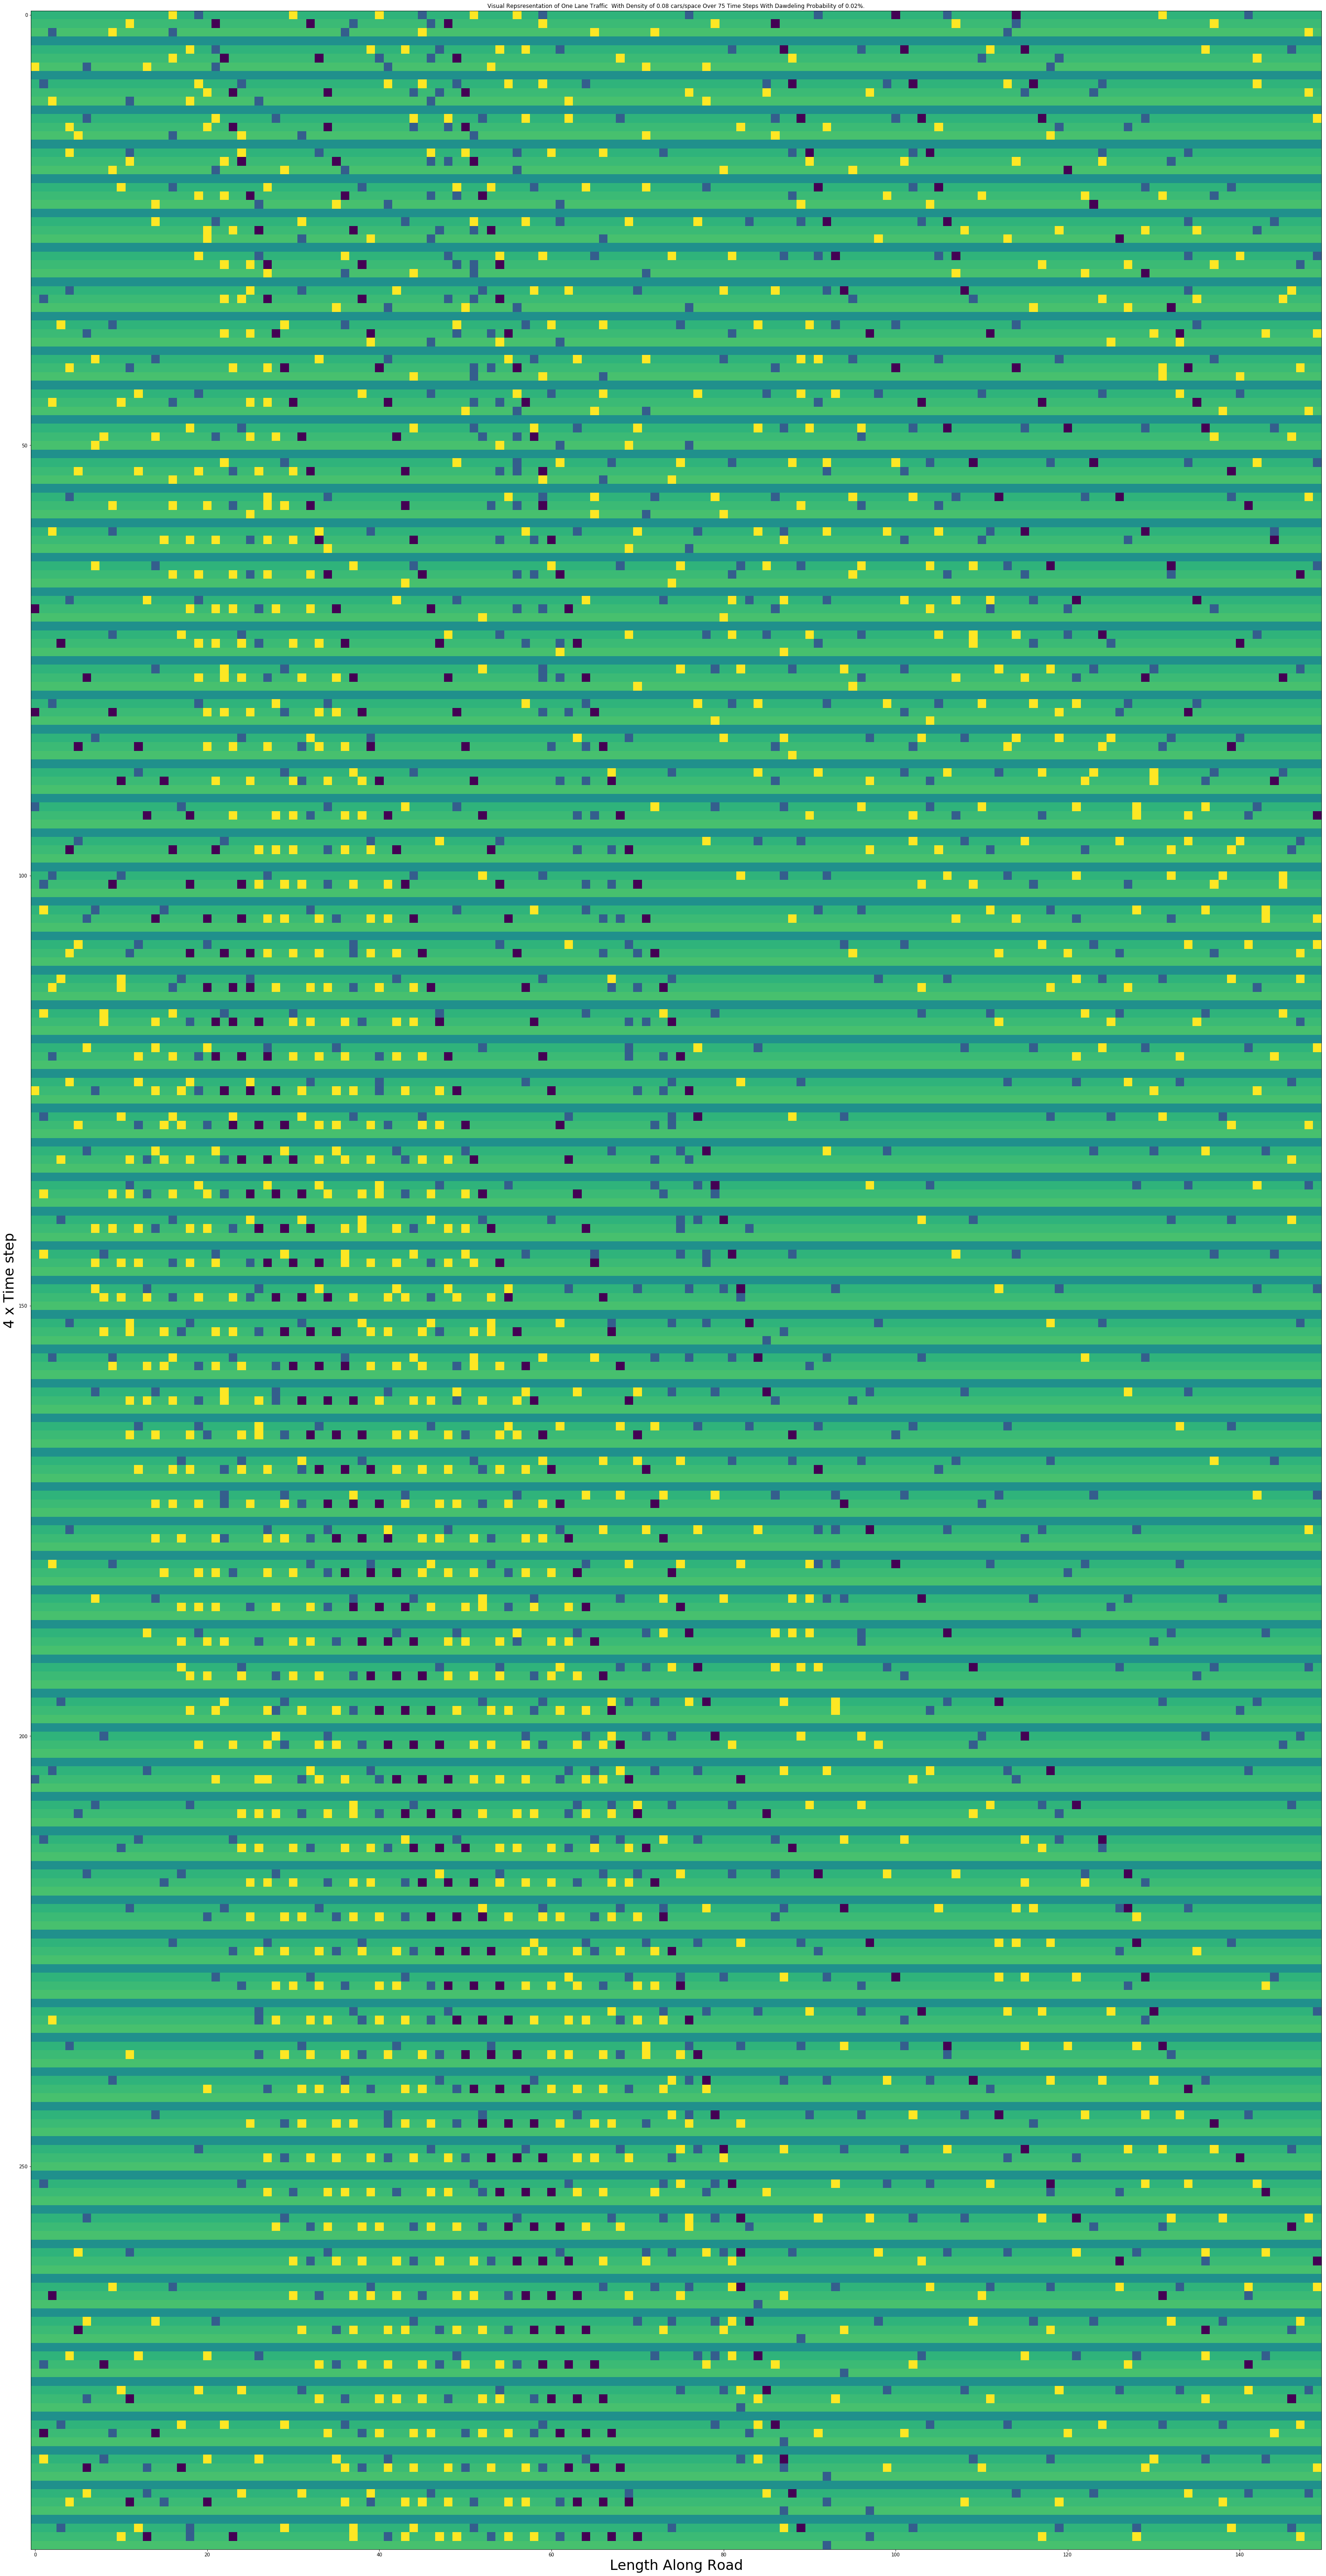

In [40]:
triple_lane_road_periodic(150, 3, 7, 11, 8/100, 0.3, 0.3, 2/100, 75)

### 26/2 ###
When looking to expand the model, I looked to see the impact of an accident on the system to see if cars would move into the other two lanes. However, due to the periodic nature of the road this wasnt particularly useful in showing us anything so instead I tried to visualalise a gradual lane closure, quite possibly due to an accident- to bring this back to the real world. The reason this is gradual is to not write over cars that are on that first lane beyond the accident.<br>

For some reason the road block sets split up after a vehicle mangages to drive onto it. Despite this, for rule 4:<br>

               if road[i].real>0 and abs(road[i].imag-2)>tol:                    
                    road= np.insert(road, i+int(road[i].real)-1, road[i])     
                    road = np.delete(road, i)<br>
                    
the use of abs(road[i].imag-2)>tol throughout is to not involve the road closure elements in the moving, or velocity changing parts of the system.<br>
<br>
Rule 2 writes:<br>

                    else:
                        count5 = 1 
                        #If there is a car directly in front slow to stationary. 
                        while abs(road[i + int(count5.real)].real)<1 and count5<vmax: 
                             #Count is the distance between two cars.
                            count5+=1 <
                        road[i]=count5 + comp
                        
and the while loop should stop cars from driving over the road closure of element -1+2j.<br>
<br>
By changing the value of the element of the road closure to 1+2j, the cars no longer interact with it, and it does not move as the real value 1 is equivilant to being stationarry and the abs(road[i].imag-2)>tol stops the rules 1, 2 and 3 from applying.<br>
<br>
This made me realise that rule currently had the ability to make staionary cars reduce in speed and thus the if statement was changed to if tripleroad[j, i].real>2.<br>
<br>
One flaw of the system we are using is that the cars do not have the ability to "look" further than the distance assocaited with the velocity they will travel in the next time step, and thus do not plan ahead for the lane closure. On a motorway there are signs and visual warnings that a lane is closed, thus this represents better an accident whereby cars only react at the last moment, and look to move into the other lane- however this is not what is simulated here, as the cars only move into the overatking lane if it is safe to do so, rather than if it is absolultely neccessary.  <br>
This is a limitation of using our CA rules.
<br>
It makes sense then to alter the lane changing rule to avoid collisions if there is an accident-  currently that is prevented by the system, but represents miraculous breaking. <br>
<br>
When plotting the visualtiation for the lanes that involve an accident it made sense to display the velocites of the vehicles as differnt colours as opposed to the differnt vehicles as this gives us more information on how vehicles interact when approached by an obsticle. The lighter the vehicle the faster it is moving

In [25]:
def triple_lane_road_periodic_accident(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, blockage, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling
        blockage = fraction of the road at which the lane closure occurs
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    tripleroad = np.zeros((3,n), dtype = complex)                         
    matrix = np.zeros((4*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    tol = 1e-4
    iterations = 1

    
    ### Car Generation ###
    for j in range(3):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while tripleroad[j,ranspace]!=0:
                ranspace = np.random.randint(0, n)
            if np.random.randint(1, 100)<percent_lorries*100 and j<2:  
                tripleroad[j, ranspace]=np.random.randint(2, vmax_lorries) -1j
            elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes*100:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j
            else:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_cars)
               
    while iterations in range(max_iterations):
        
        #create loop like extention to the end of the road
        leftlane = np.concatenate((tripleroad[0,], tripleroad[0,]))
        middlelane = np.concatenate((tripleroad[1,], tripleroad[1,]))
        rightlane = np.concatenate((tripleroad[2,], tripleroad[2,]))

        for i in range(n-vmax_bikes, -1, -1):
            
            #setting the max speed depending on vehicle type
            if leftlane[i].imag == -1:
                vmax = vmax_lorries
            elif leftlane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
                
            #for the middle lane
            if middlelane[i].imag == -1:
                vmax = vmax_lorries
            elif middlelane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
                
            #for the right lane
            if rightlane[i].imag == -1:
                vmax = vmax_lorries
            elif rightlane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
            
            
            ### Overtaking ###
        
            #cars in the left lane:
            if leftlane[i].real>1 and abs(leftlane[i].imag-2)>tol :
                #space in the middle lane for it to move forward into
                if middlelane[i].real==0:
                    # are there cars in front?
                    if sum(leftlane[i+1:i+int(leftlane[i].real)].real)!=0:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while leftlane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  leftlane[i].real>count: 
                            #if the speed of the car is slowe than its max
                            if leftlane[i].real< vmax: #leftlane[i + count+1].real: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the middle lane wont have to slow down
                                    count2 = 0 
                                    while middlelane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if middlelane[[i - count2-1]].real<count2:
                        
                                        #ensuring the car won't have to slow down in the middle lane
                                        count3 = 0 
                                        while middlelane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                            
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  leftlane[i].real<count3:
                                            leftlane[i]+=1
                                            #move into the middle lane
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                                            
                                            if middlelane[i]<vmax:
                                                middlelane[i]+=1
                        
                                        #if the cars that are in front are faster
                                        elif leftlane[i].real<middlelane[i + count3+1].real:
                                            #move into the middle lane
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                                            
                                            if middlelane[i]<vmax:
                                                middlelane[i]+=1
    
            ### Moving to the slower lane ###
    
            #cars in the right lane:
            if rightlane[i].real>1 and abs(rightlane[i].imag-2)>tol:
                #space in the middle lane for it to move forward into
                if middlelane[i].real==0:
            
                    #if cars in the middle lane ahead are traveling at the same speed or faster
                    count4=0 
                    while middlelane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  rightlane[i].real<=count4:
                    
                        #move into the middle lane
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, rightlane[i])                                          
                                                                  
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down
                    elif 2*rightlane[i].real<=middlelane[i + count4+1].real:

                        #move into the middle lane
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, rightlane[i])                                          
                                             
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                        
            ### cars in the middle lane can overtake or go into the slower lane
            ### Overtaking ###
        
            #cars in the middle lane:
            if middlelane[i].real>1 and abs(middlelane[i].imag-2)>tol:
                #space in the right lane for it to move forward into
                if rightlane[i].real==0:
                    # are there cars in front?
                    if sum(middlelane[i+1:i+int(middlelane[i].real)].real)!=0:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while middlelane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  middlelane[i].real>count: 
                            #if the speed of the car is slower than it's max
                            if middlelane[i].real< vmax: #middlelane[i + count+1].real: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the right lane wont have to slow down
                                    count2 = 0 
                                    while rightlane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if rightlane[[i - count2-1]].real<count2:
                                        #ensuring the car won't have to slow down in the right lane
                                        count3 = 0 
                                        while rightlane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  middlelane[i].real<count3:
                                            #move into the right lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, middlelane[i])
                                                                  
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, 0)
                                            
                                            if rightlane[i]<vmax:
                                                rightlane[i]+=1
                        
                                        #if the cars that are in front are faster
                                        elif middlelane[i].real<rightlane[i + count3+1].real:
     
                                            #move into the right lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, middlelane[i])
                                                                  
                                            middlelane = np.delete(middlelane, i)
                                            middleane = np.insert(middlelane, i, 0)
                            
                                            if rightlane[i]<vmax:
                                                rightlane[i]+=1
    
            ### Moving to the slower lane ###
    
            #cars in the middle lane:
            if middlelane[i].real>1 and abs(middlelane[i].imag-2)>tol:
                #space in the left lane for it to move forward into
                if leftlane[i].real==0:
                    #if cars in the left lane ahead are traveling at the same speed or faster
                    count4=0 
                    while leftlane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  middlelane[i].real<=count4:
                    
                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, middlelane[i])                                          
                                                                  
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, 0)
            
        
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        tripleroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        tripleroad[1,] = np.concatenate((middlelane[n:n+int(n/2)], middlelane[int(n/2):n]))
        tripleroad[2,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))
        
        for j in range(3):
            
            ##create loop like extention to the end of the road
            road = np.concatenate((tripleroad[j,], tripleroad[j,]))
                   
            #iterate along the road
            for i in range(2*(n-vmax_bikes),  -1, -1):
                
                #save the complex part to add on when any changes to the velocity are made
                comp = road[i].imag*1j
                
                
                #setting the max speed depending on vehicle type
                if road[i].imag == -1:
                    vmax = vmax_lorries
                elif road[i].imag == 1:
                    vmax = vmax_bikes
                else:
                    vmax = vmax_cars
                
                
                ### Rule 1 ###
                # If the velocity v of the car is lower than vmax , and the distance to the next car or blockage
                # ahead is larger than v + 1, the speed is increased by one.
                if road[i].real>0 and abs(road[i].imag-2)>tol: 
                    #if there are no cars in front
                    if sum(road[i+1:i+int(road[i].real)].real)<tol and road[i].real<vmax:
                        road[i]+=1
            
                    ### Rule 2###
                
                    # If a driver at site i sees the next vehicle or blockage at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        #If there is a car directly in front slow to stationary.
                        while road[i + count5].real<tol and count5<vmax:
                             #Count is the distance between two cars.
                            count5+=1
                        road[i]=count5 + comp
            ### Rule 4 ###
        
            # Each vehicle is advanced by v sites.
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-vmax_bikes, -1, -1): 

                #cars move forward 
                if road[i].real>0 :                       
                    road= np.insert(road, i+int(road[i].real)-1, road[i])       
                    road = np.delete(road, i)
                
              
            #reduce the road back to the original shape
            tripleroad[j,] = np.concatenate((road[n:n+int(n/2)], road[int(n/2):n]))

            ###Rule 3 ###
                
            # The velocity of each moving vehicle is decreased by one with probability p.
            for i in range(n):
                if np.random.randint(1, 100)<prob_car_daw*100:       
                    if tripleroad[j, i].real>2 and abs(road[i].imag-2)>tol:                                     
                        tripleroad[j, i]-=1
                        
                      
       
        #Visualisation
        for j in range(3):
            for i in range(n):
                if tripleroad[j, i]==0:
                    matrix[4*(iterations-1) +j,i]= 5+3*j 
                elif tripleroad[j, i].imag == 2:
                    matrix[4*(iterations-1) +j,i]= -50 #-30*j
                else:
                    matrix[4*(iterations-1) +j,i]= 70+10*tripleroad[j, i].real
                    
                    
       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
            #    #if tripleroad[j,i]==0:
            #    street.append(tripleroad[0,i])
            #    else:
            #        street.append(tripleroad[j,i]-1)
            #print(iterations, street)
            #print("")
            
            ### Data collection ###
        
            #data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)
 
        
        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)
        
       
        #road blockage
        if iterations>max_iterations*blockage and (0.7*n+(iterations - max_iterations*blockage)*2)<=n:
            tripleroad[0, int(0.7*n): int(0.7*n+(iterations - max_iterations*blockage)*2)]= 1+2j  
            
        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('4 x Time step')
    ax11.set_title("Visual Repsresentation of Triple Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix) 
             
  

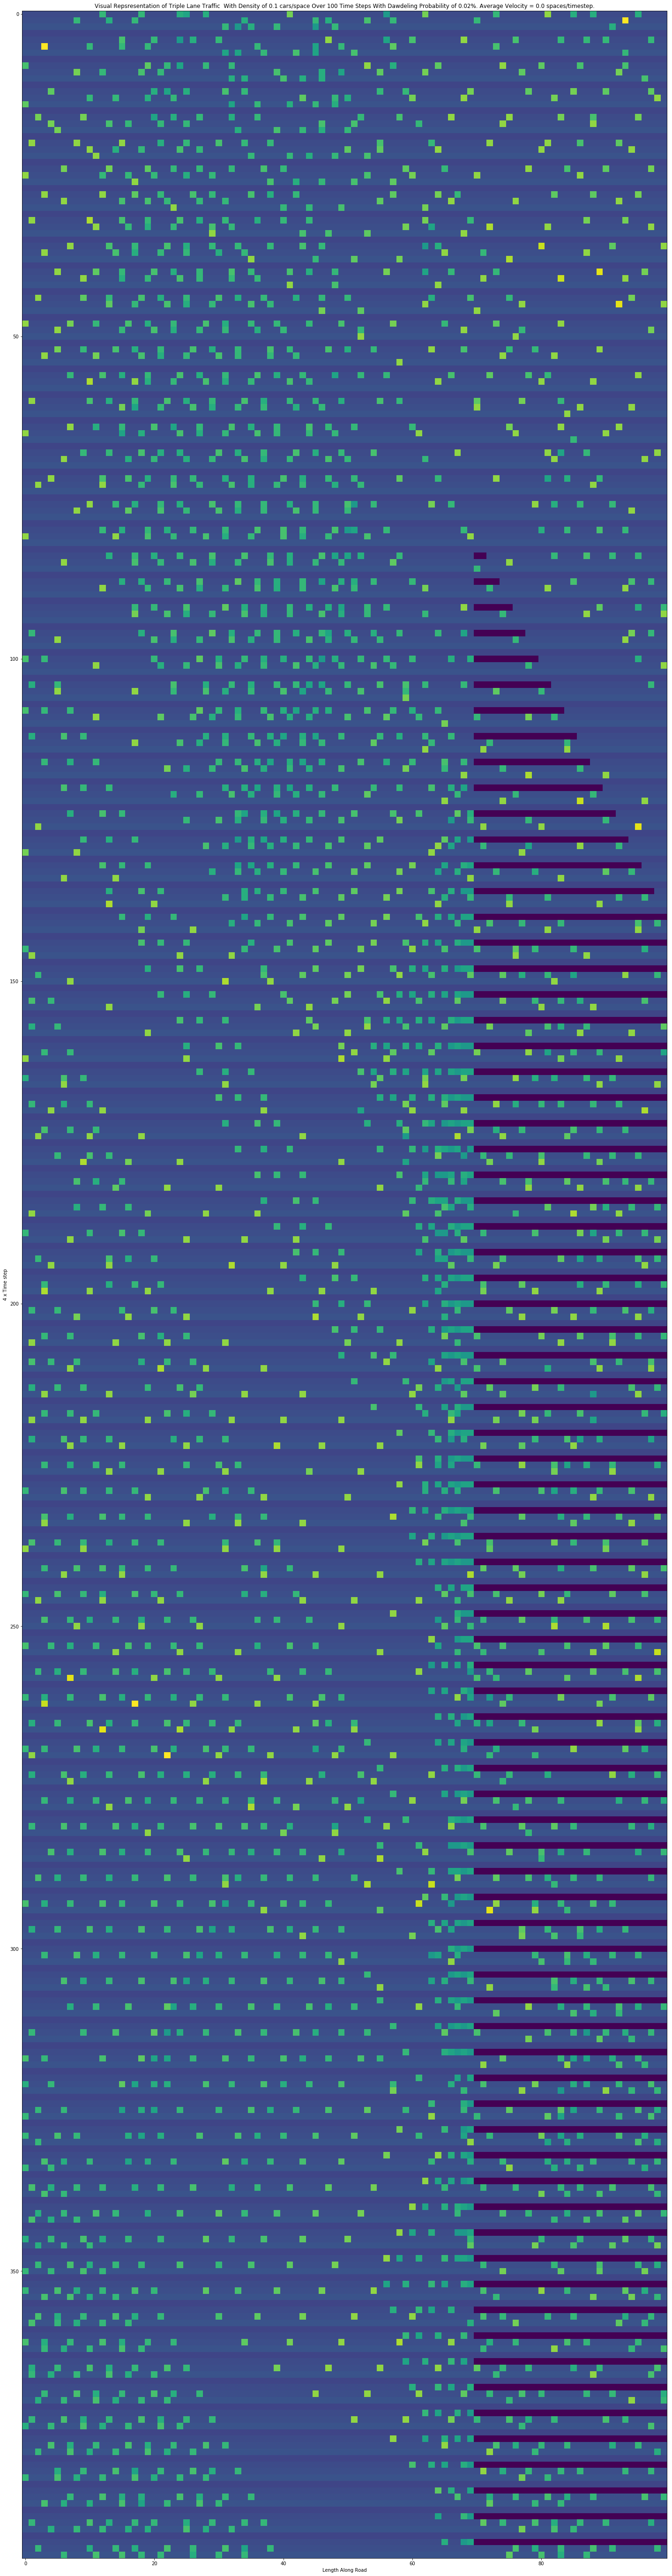

In [26]:
triple_lane_road_periodic_accident(100, 4, 8, 12, 10/100, 0.3, 0.3, 2/100, 0.2, 100)

### 28/2 ###

Now looking at altering the lane changing system to be able to account for emergencies. This will look at altering the condition in the overtaking command that ensures that cars in the other lane won't have to slow down.
In this case the cars won't need to increase speed as they change lane as they arent looking to overtake to be advantagous but to prevent an accident, thus we look at decreasing their speed to what is required to not crash. 

We will say that if a vehicle is traveling faster its vmax/2 then it is traveling too fast to reasonably slow down ans thus must swerve into the other lane in order to avoid crashing with the staionary object in front of it.
Looking at a car in the other lane traveling at velocity u, and is distance l in front of the car we are focused on, the car moving into the other lane must change its speed to at least l+u-1 if v is greater than l+u.

If there is a car in the overtaking lane travelling at speed u and is a distance l behind the car looking to overtake, and u-d is greater than v this car must slow to v-d-1. We must store the complex part of this car to add back on.

Yes again this does involve some miraculous breaking, so after this we could look at implementing a maximum deceleration.

The overtaking rule again had to be altered where by a car would look to overtake if the velocity of the car is greater or equal to than the distance to the next car as opposed to just greater, and this was to incentivise stationary cars to look to overtake the stationary road closure in front of them. 

In [34]:
def triple_lane_road_periodic_accident_lane_change(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, blockage, max_iterations):

    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling
        blockage = fraction of the road at which the lane closure occurs
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    tripleroad = np.zeros((3,n), dtype = complex)                         
    matrix = np.zeros((4*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    tol = 1e-4
    iterations = 1
    
    #road closure
    #tripleroad[0, int(n*0.6):int(n)] = 1+2j
    
    ### Car Generation ###
    for j in range(3):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while tripleroad[j,ranspace]!=0:
                ranspace = np.random.randint(0, n)
            if np.random.randint(1, 100)<percent_lorries*100 and j<2:  
                tripleroad[j, ranspace]=np.random.randint(2, vmax_lorries) -1j
            elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes*100:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j
            else:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_cars)
               
    while iterations in range(max_iterations):
        
        #create loop like extention to the end of the road
        leftlane = np.concatenate((tripleroad[0,], tripleroad[0,]))
        middlelane = np.concatenate((tripleroad[1,], tripleroad[1,]))
        rightlane = np.concatenate((tripleroad[2,], tripleroad[2,]))

        for i in range(n-vmax_bikes, -1, -1):
            
            #setting the max speed depending on vehicle type
            if leftlane[i].imag == -1:
                vmax = vmax_lorries
            elif leftlane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
                
            #for the middle lane
            if middlelane[i].imag == -1:
                vmax = vmax_lorries
            elif middlelane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
                
            #for the right lane
            if rightlane[i].imag == -1:
                vmax = vmax_lorries
            elif rightlane[i].imag == 1:
                vmax = vmax_bikes
            else:
                vmax = vmax_cars
            
            
            ### Overtaking ###
        
            #cars in the left lane:
            if leftlane[i].real>1 and abs(leftlane[i].imag-2)>tol :
                #space in the middle lane for it to move forward into
                if middlelane[i].real==0:
                    # are there cars in front?
                    if sum(leftlane[i+1:i+int(leftlane[i].real)].real)!=0:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while leftlane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  leftlane[i].real>count: 
                            #if the speed of the car is slowe than its max
                            if leftlane[i].real< vmax: #leftlane[i + count+1].real: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the middle lane wont have to slow down
                                    count2 = 0 
                                    while middlelane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if middlelane[[i - count2-1]].real<count2:
                        
                                        #ensuring the car won't have to slow down in the middle lane
                                        count3 = 0 
                                        while middlelane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                            
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  leftlane[i].real<count3:
                                            leftlane[i]+=1
                                            #move into the middle lane
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                                            
                                            if middlelane[i]<vmax:
                                                middlelane[i]+=1
                        
                                        #if the cars that are in front are faster
                                        elif leftlane[i].real<middlelane[i + count3+1].real:
                                            #move into the middle lane
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                                            
                                            if middlelane[i]<vmax:
                                                middlelane[i]+=1
                                                     
                                    ### evasive lane changing ###            
                                    #and if the car in question is traveling at at least half of its velocity.
                                    elif abs(leftlane[i + count].real - 1)<tol and leftlane[i].real -1 > vmax/2:
                                        #determining how far forward the car in the other lane is.
                                        count3 = 1 
                                        while middlelane[i + count3].real<1 and count3<=vmax:
                                            count3+=1
                                        # if the speed of the car in the other lane is too slow to ordinarily 
                                        # allow the car to overtake to safety
                                        if leftlane[i].real > middlelane[i + count3].real + count3:
                                            #reduce cars speed to be able to move into lane safely
                                            leftlane[i] = middlelane[i + count3].real + count3 -1 + comp
                                            
                                            #move into the other lane
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                                          
                                        #the car in the other lane that is behind would ordinarily move past our car
                                        elif middlelane[i - count2].real - count2 > leftlane[i].real:
                                            #reduce other cars speed to allow the car to move into lane safely ahead of it
                                            comp2 = middlelane[i - count2].imag*1j
                                            middlelane[i - count2] = leftlane[i].real + count2 -1 +comp2
                                            
                                            #move into the other lane
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])
                                                                  
                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
    
            ### Moving to the slower lane ###
    
            #cars in the right lane:
            if rightlane[i].real>1 and abs(rightlane[i].imag-2)>tol:
                #space in the middle lane for it to move forward into
                if middlelane[i].real==0:
            
                    #if cars in the middle lane ahead are traveling at the same speed or faster
                    count4=0 
                    while middlelane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  rightlane[i].real<=count4:
                    
                        #move into the middle lane
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, rightlane[i])                                          
                                                                  
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down
                    elif 2*rightlane[i].real<=middlelane[i + count4+1].real:

                        #move into the middle lane
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, rightlane[i])                                          
                                             
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                        
            ### cars in the middle lane can overtake or go into the slower lane
            ### Overtaking ###
        
            #cars in the middle lane:
            if middlelane[i].real>1 and abs(middlelane[i].imag-2)>tol:
                #space in the right lane for it to move forward into
                if rightlane[i].real==0:
                    # are there cars in front?
                    if sum(middlelane[i+1:i+int(middlelane[i].real)].real)!=0:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while middlelane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  middlelane[i].real>count: 
                            #if the speed of the car is slower than it's max
                            if middlelane[i].real< vmax: #middlelane[i + count+1].real: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the right lane wont have to slow down
                                    count2 = 0 
                                    while rightlane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if rightlane[[i - count2-1]].real<count2:
                                        #ensuring the car won't have to slow down in the right lane
                                        count3 = 0 
                                        while rightlane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  middlelane[i].real<count3:
                                            #move into the right lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, middlelane[i])
                                                                  
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, 0)
                                            
                                            if rightlane[i]<vmax:
                                                rightlane[i]+=1
                        
                                        #if the cars that are in front are faster
                                        elif middlelane[i].real<rightlane[i + count3+1].real:
     
                                            #move into the right lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, middlelane[i])
                                                                  
                                            middlelane = np.delete(middlelane, i)
                                            middleane = np.insert(middlelane, i, 0)
                            
                                            if rightlane[i]<vmax:
                                                rightlane[i]+=1
    
            ### Moving to the slower lane ###
    
            #cars in the middle lane:
            if middlelane[i].real>1 and abs(middlelane[i].imag-2)>tol:
                #space in the left lane for it to move forward into
                if leftlane[i].real==0:
                    #if cars in the left lane ahead are traveling at the same speed or faster
                    count4=0 
                    while leftlane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  middlelane[i].real<=count4:
                    
                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, middlelane[i])                                          
                                                                  
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, 0)
            
        
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        tripleroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        tripleroad[1,] = np.concatenate((middlelane[n:n+int(n/2)], middlelane[int(n/2):n]))
        tripleroad[2,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))
        
        for j in range(3):
            
            ##create loop like extention to the end of the road
            road = np.concatenate((tripleroad[j,], tripleroad[j,]))
                   
            #iterate along the road
            for i in range(2*(n-vmax_bikes),  -1, -1):
                
                #save the complex part to add on when any changes to the velocity are made
                comp = road[i].imag*1j
                
                
                #setting the max speed depending on vehicle type
                if road[i].imag == -1:
                    vmax = vmax_lorries
                elif road[i].imag == 1:
                    vmax = vmax_bikes
                else:
                    vmax = vmax_cars
                
                
                ### Rule 1 ###
                # If the velocity v of the car is lower than vmax , and the distance to the next car or blockage
                # ahead is larger than v + 1, the speed is increased by one.
                if road[i].real>0 and abs(road[i].imag-2)>tol: 
                    #if there are no cars in front
                    if sum(road[i+1:i+int(road[i].real)].real)<tol and road[i].real<vmax:
                        road[i]+=1
            
                    ### Rule 2###
                
                    # If a driver at site i sees the next vehicle or blockage at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        #If there is a car directly in front slow to stationary.
                        while road[i + count5].real<tol and count5<vmax:
                             #Count is the distance between two cars.
                            count5+=1
                        road[i]=count5 + comp
            ### Rule 4 ###
        
            # Each vehicle is advanced by v sites.
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-vmax_bikes, -1, -1): 

                #cars move forward 
                if road[i].real>0 :                       
                    road= np.insert(road, i+int(road[i].real)-1, road[i])       
                    road = np.delete(road, i)
                
              
            #reduce the road back to the original shape
            tripleroad[j,] = np.concatenate((road[n:n+int(n/2)], road[int(n/2):n]))

            ###Rule 3 ###
                
            # The velocity of each moving vehicle is decreased by one with probability p.
            for i in range(n):
                if np.random.randint(1, 100)<prob_car_daw*100:       
                    if tripleroad[j, i].real>2 and abs(road[i].imag-2)>tol:                                     
                        tripleroad[j, i]-=1
                        
                      
       
        #Visualisation
        for j in range(3):
            for i in range(n):
                if tripleroad[j, i]==0:
                    matrix[4*(iterations-1) +j,i]= 5+3*j 
                elif tripleroad[j, i].imag == 2:
                    matrix[4*(iterations-1) +j,i]= -50 #-30*j
                else:
                    matrix[4*(iterations-1) +j,i]= 70+10*tripleroad[j, i].real
                    
                    
       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
            #    #if tripleroad[j,i]==0:
            #    street.append(tripleroad[0,i])
            #    else:
            #        street.append(tripleroad[j,i]-1)
            #print(iterations, street)
            #print("")
            
            ### Data collection ###
        
            #data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)
 
        
        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)
        
       
        #road blockage
        if iterations>max_iterations*blockage and (0.7*n+(iterations - max_iterations*blockage)*2)<=n:
            tripleroad[0, int(0.7*n): int(0.7*n+(iterations - max_iterations*blockage)*2)]= 1+2j  
            
        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('4 x Time step')
    ax11.set_title("Visual Repsresentation of Triple Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix) 
             
  


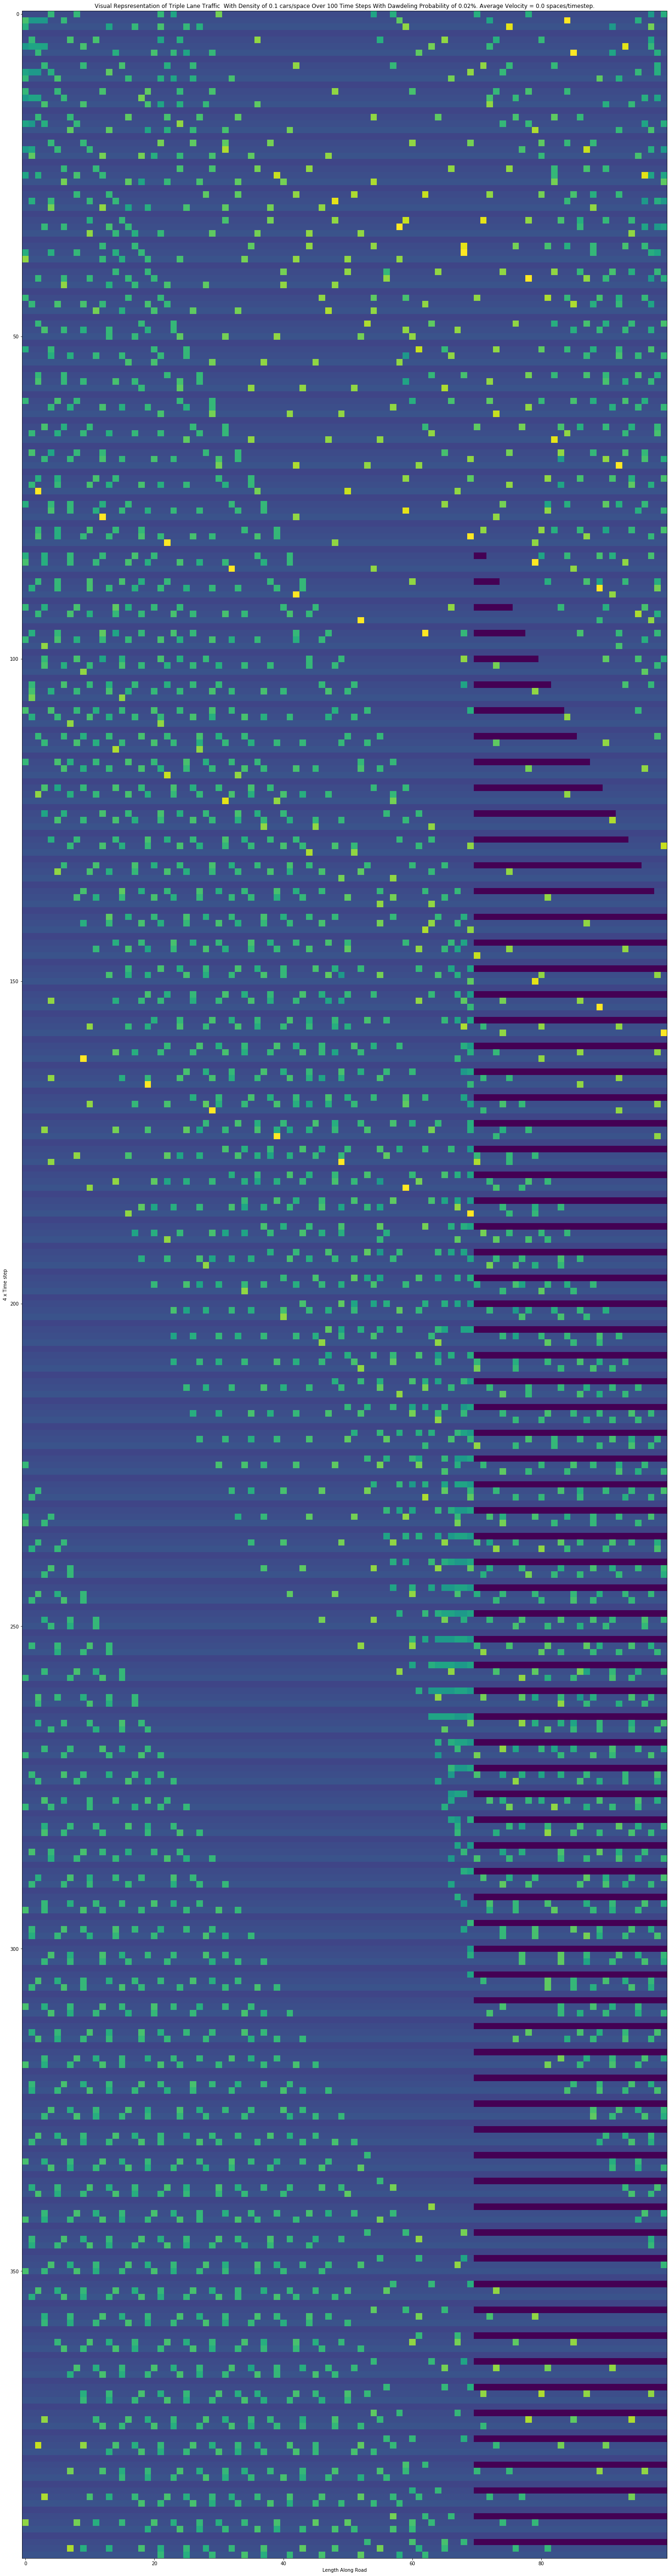

In [35]:
triple_lane_road_periodic_accident_lane_change(100, 4, 8, 12, 10/100, 0.3, 0.3, 2/100, 0.2, 100)

### 28/2 cont. ###
What we see as a result of the road closure/ accident is that the cars on the road now bunch up, and large gaps of no cars are seen between the start and the end of this bunched up group containing all the cars. However when we increase the number of iterations these gaps seem to disappear as the cars began to spread out over the road.




### 4/3 ###
Wanting to momentarily break free from being a physicist and move away from modeling every object as a point mass, I thought it would be a good idea to visualise the vehciles more realistically, where the lorries are bigger than the cars, which are bigger than the motorbikes. This would make for a more realistic calculation of space between vehicles, as well as how the vehicles interact with each other.
<br>
We would set up a visualisation where lorries to be bigger than the cars (take up 5 and 2 spaces respectivly), which are bigger than the motorbikes (1 space).<br>
This would envolve ensureing that if an element is the same as the one before, it moves in the exact same way and doesn't follow the rules of the CA.<br>
<br>
Attempting this visualisation method, the vehicles must be generated in a different way, whereby we must account for whether there is ample space behind the inital generated part for the rest of the vehicle if it is larger than one space. This condition was used:<br>
while sum(tripleroad[j,ranspace-3:ranspace:].real)!=0:<br>
<br>
throughout, using road[i]!=road[i+1] at each rule is important so that only the front of the vehicle adhears to the rules, and the rest follows the front, avoiding seperation of the vehicle:<br>
<br>
When testing to see if this approach works, while ignoring lane changing for now, and when removing rule 4 we can see that the output is as we would expect:<br>
<br>
0 [0j, 0j, 0j, 0j, (7+1j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (15+1j), 0j, 0j, 0j]<br>
0 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (12+1j), 0j, 0j, (4+0j), (4+0j), 0j, 0j, 0j, 0j, 0j, 0j, (6+0j), (6+0j), 0j, 0j, 0j, 0j, 0j]<br>
0 [0j, 0j, 0j, (14+1j), 0j, (1-1j), (1-1j), (1-1j), 0j, 0j, (7+0j), (7+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
<br>
1 [0j, 0j, 0j, (8+1j), (8+1j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (7+1j), (7+1j), 0j, 0j, 0j]<br>
1 [0j, 0j, 0j, 0j, 0j, 0j, 0j, (3+1j), (3+1j), 0j, 0j, (4+0j), (4+0j), 0j, 0j, 0j, 0j, 0j, 0j, (1+0j), (7+0j), 0j, 0j, 0j, 0j, 0j]<br>
1 [0j, 0j, (2+1j), (2+1j), 0j, (2-1j), (2-1j), (2-1j), 0j, 0j, (7+0j), (7+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
<br>
However when rule 4 is used, we can see an error, the vehicles rather than just moving. <br>
<br>
2 [0j, 0j, 0j, 0j, (10+0j), (10+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, (8+0j), (8+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
2 [0j, 0j, 0j, (11+0j), (11+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (5+0j), (5+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]<br>
2 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (8+0j), (8+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (2+0j), (2+0j), 0j, 0j, 0j, 0j]<br>
<br>
3 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (8+0j), (8+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (9+0j), (9+0j), 0j, 0j, 0j, 0j, 0j, 0j]<br>
3 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (5+0j), (12+0j), (12+0j), 0j, 0j, 0j, 0j, 0j, (6+0j), (6+0j), 0j, 0j, 0j, 0j, 0j, 0j]<br>
3 [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (9+0j), (9+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (3+0j), (3+0j), 0j]<br>
<br>
And the reason for this is when bring the two halves of the road back together, as part of a longer vehicle may be at the end, and when the road is put back together it is uncoupled. The solution to this was to only bring the two halves together if the ends were empty, and if not move along the array and take a cut where they are, then use np. roll to give us the orignal road we wanted. This works fine when the percentage of lorries and motorbikes are 0, however when not, it again breaks down and the number of vehicles on the road increases as the number of iterations increases. <br>
<br>
Trying to understand why, has not been easy!<br>
<br>
### 6/3 ###
I decided to go back to  a signle lane situation to see of I could find the underlying situation. <br>
From this we can see that trying to move the vehicles in such a fashion deos not work:<br>

                        road[i+int(road[i].real)-2] = road[i]
                        road[i+int(road[i].real) -3] = road[i]
                        road[i+int(road[i].real) -4] = road[i]
                        road[i+int(road[i].real) -5] = road[i]
                        road[i+int(road[i].real) -6] = road[i]
                        road[i] = 0 
                        road[i-1] = 0
                        road[i-2] = 0
                        road[i-3] = 0
                        road[i-4] = 0
                        
           
Nor does<br>

                    if abs(road[i].imag + 1)< tol:
                        road= np.insert(road, i+int(road[i].real)-1, road[i])
                        road= np.insert(road, i+int(road[i].real)-2, road[i])
                        road= np.insert(road, i+int(road[i].real)-3, road[i]) 
                        road= np.insert(road, i+int(road[i].real)-4, road[i]) 
                        road= np.insert(road, i+int(road[i].real)-5, road[i]) 
                        road = np.delete(road, i) 
                        road = np.delete(road, i-1) 
                        road = np.delete(road, i-2) 
                        road = np.delete(road, i-3) 
                        road = np.delete(road, i-4) 


                    elif abs(road[i].imag - 1)< tol: 
                        road= np.insert(road, i+int(road[i].real)-1, road[i])  
                        road= np.insert(road, i+int(road[i].real)-2, road[i]) 
                        road = np.delete(road, i) 
                        road = np.delete(road, i-1)


                    else:         
                        road= np.insert(road, i+int(road[i].real)-1, road[i]) 
                        road = np.delete(road, i)
Meaning there is a underlying problem. <br>

Somehow rule 4 changes every space to have the value of 3+1j:<br>
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  2.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j  0.+0.j  0.+0.j  0.+0.j 14.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j  0.+0.j  0.+0.j  0.+0.j 11.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  2.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  7.+0.j  7.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  5.+0.j  5.+0.j  0.+0.j  0.+0.j  4.+1.j<br>
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j 12.+1.j  0.+0.j<br>
 11.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j  0.+0.j  5.+0.j  5.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j<br>
  0.+0.j]<br>
  
[3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j<br>
 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j 3.+1.j]<br>
 <br>
Then I relaised that for the 4th rule you can move part of the vehicle forward in the normal way treating them as if they are all individual vehicles and they will all remain togehter. This works for one lane, now time to scale it to multiple lanes.

In [99]:
def single_lane_road_periodic_vis(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling
        blockage = fraction of the road at which the lane closure occurs
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    road = np.zeros(n, dtype = complex)                         
    matrix = np.zeros((max_iterations, n))
    data= np.zeros((2*max_iterations, 2))
    tol = 1e-4
    iterations = 0
    
    #road closure
    #tripleroad[0, int(n*0.6):int(n)] = 1+2j
                
    ### Car Generation ###
    
    for i in range(round(n*density)):
        ranspace = np.random.randint(0, n)
        while sum(road[ranspace-4:ranspace+1])>0:
            ranspace = np.random.randint(0, n)
        if np.random.randint(1, 100)<percent_lorries*100 :  
            road[ranspace- 4:ranspace+1]=np.random.randint(2, vmax_lorries) -1j
        elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes*100:
            road[ranspace]=np.random.randint(2, vmax_bikes) +1j
        else:
            road[ranspace-1:ranspace+1]=np.random.randint(2, vmax_cars)
    
    while iterations in range(max_iterations):
        
        ##create loop like extention to the end of the road
        road = np.concatenate((road, road))

        #iterate along the road
        for i in range(2*(n-vmax_bikes),  -1, -1):

            #save the complex part to add on when any changes to the velocity are made
            comp = road[i].imag*1j


            #setting the max speed depending on vehicle type
            if road[i].imag == -1:
                vmax = vmax_lorries
                t=4
            elif road[i].imag == 1:
                vmax = vmax_bikes
                t=0
            else:
                vmax = vmax_cars
                t=1


            ### Rule 1 ###
            # If the velocity v of the car is lower than vmax , and the distance to the next car or blockage
            # ahead is larger than v + 1, the speed is increased by one.
            if road[i].real>0 and abs(road[i].imag-2)>tol and road[i]!=road[i+1]: 
                #if there are no cars in front
                if sum(road[i+1:i+int(road[i].real)].real)<tol and road[i].real<vmax:
                    road[i-t:i+1]+=1

                ### Rule 2###

                # If a driver at site i sees the next vehicle or blockage at site i+j, with j < v, 
                # they reduce speed to j −1.  
                else:
                    count5 = 1
                    #If there is a car directly in front slow to stationary.
                    while road[i + count5].real<tol and count5<vmax:
                         #Count is the distance between two cars.
                        count5+=1
                    road[i-t:i+1]=count5 + comp

        ### Rule 4 ###

        # Each vehicle is advanced by v sites.
        # As the vechicles move forward we have to iterate in reverse as cars move forward.
        for i in range(2*n-vmax_bikes, -1, -1): 

            #cars move forward 
            if road[i].real>0  and road[i]!=road[i+1]: 
                #if abs(road[i] - road[i+1])>tol:  
                    #if abs(road[i].imag + 1)< tol:
                    #    road= np.insert(road, i+int(road[i].real)-1, road[i]) 
                    #    road= np.insert(road, i+int(road[i].real)-2, road[i]) 
                    #    road= np.insert(road, i+int(road[i].real)-3, road[i]) 
                    #    road= np.insert(road, i+int(road[i].real)-4, road[i]) 
                    #    road= np.insert(road, i+int(road[i].real)-5, road[i]) 
                    #    road = np.delete(road, i)
                    #    road = np.delete(road, i-1)
                    #    road = np.delete(road, i-2)
                    #    road = np.delete(road, i-3)
                    #    road = np.delete(road, i-4)


                    #elif abs(road[i].imag - 1)< tol:
                    #    road= np.insert(road, i+int(road[i].real)-1, road[i]) 
                    #    road= np.insert(road, i+int(road[i].real)-2, road[i]) 
                    #    road = np.delete(road, i)
                    #    road = np.delete(road, i-1)


                    #else:        
                road= np.insert(road, i+int(road[i].real)-1, road[i])
                road = np.delete(road, i)




        #reduce the road back to the original shape
        i=0
        while abs(road[int(n/2)+i])<tol and abs(road[int(n/2)+i-1])<tol:
            i-=1
        road= np.roll(np.concatenate((road[n+i:n+int(n/2)+i], road[int(n/2)+i:n+i])), i)


        #Visualisation
        for i in range(n):
            if road[i]==0:
                matrix[iterations,i]= 15 
            elif road[i].imag == -1:
                matrix[iterations,i]= -30 #-30*j
            elif road[i].imag == 1:
                matrix[iterations,i]= 50 #-30*j
            elif road[i].imag == 2:
                matrix[iterations,i]= -50 #-30*j
            else:
                matrix[iterations,i]= -10 #+30*j


       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
            #    #if tripleroad[j,i]==0:
            #    street.append(road[i])
            #    else:
            #        street.append(tripleroad[j,i]-1)
            #print(iterations, street)
        #print(road)
       # print("")

            ### Data collection ###

            #data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)


        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)

        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('4 x Time step')
    ax11.set_title("Visual Repsresentation of Tripple Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix) 
             




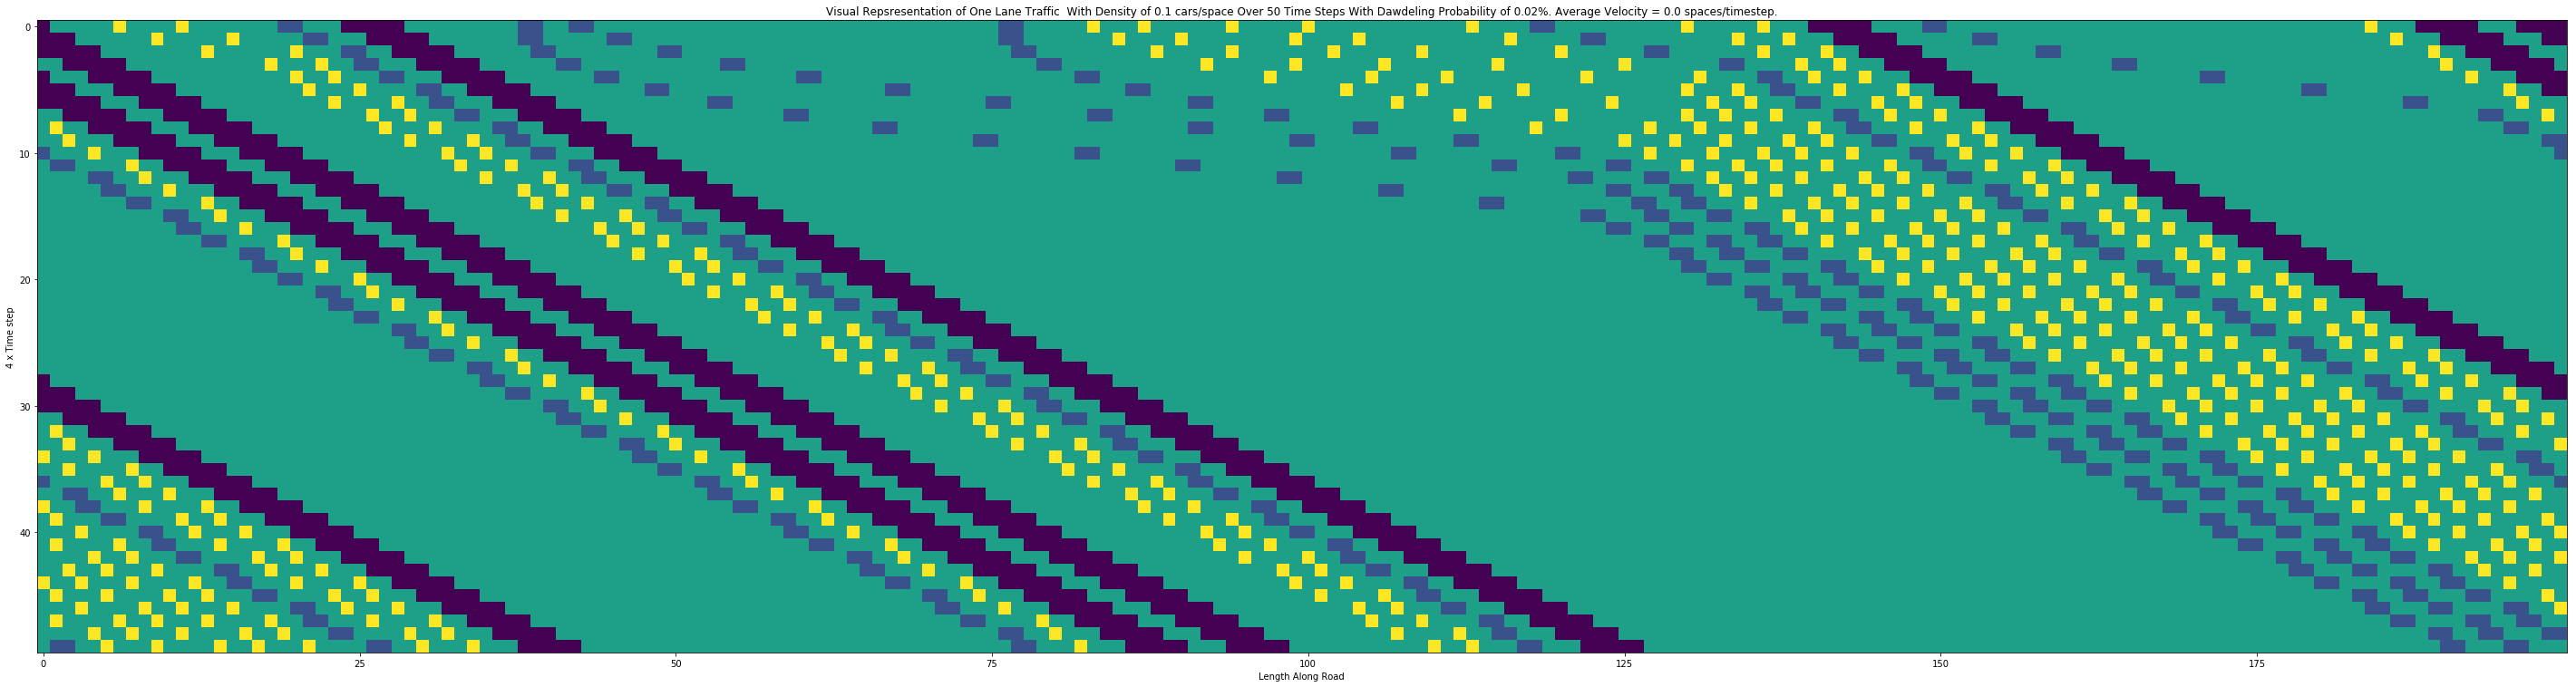

In [152]:
single_lane_road_periodic_vis(200, 4, 10, 16, 10/100, 0.2, 0.3, 2/100, 50)

In [153]:
def multi_lane_road_periodic_no_lane_change(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling
        blockage = fraction of the road at which the lane closure occurs
        max_iterations = number of timesteps
    ''' 
    #Create empty road and matrix to store iterations
    tripleroad = np.zeros((3,n), dtype = complex)                         
    matrix = np.zeros((4*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    tol = 1e-4
    iterations = 0
    
    #road closure
    #tripleroad[0, int(n*0.6):int(n)] = 1+2j
    
    ### Car Generation ###
    for j in range(3):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while sum(tripleroad[j,ranspace-4:ranspace+1])>0:
                ranspace = np.random.randint(0, n)
            if np.random.randint(1, 100)<percent_lorries*100 and j<3-1:  
                tripleroad[j, ranspace- 4:ranspace+1]=np.random.randint(2, vmax_lorries) -1j
            elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes*100:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j
            else:
                tripleroad[j, ranspace-1:ranspace+1]=np.random.randint(2, vmax_cars)
    
    while iterations in range(max_iterations):
        
        ##create loop like extention to the end of the road
        leftlane = np.concatenate((tripleroad[0,], tripleroad[0,]))
        middlelane = np.concatenate((tripleroad[1,], tripleroad[1,]))
        rightlane = np.concatenate((tripleroad[2,], tripleroad[2,]))
        
        for i in range(n-vmax_bikes, -1, -1):
            
            #setting the max speed depending on vehicle type
            if leftlane[i].imag == -1:
                vmax = vmax_lorries
                comp = leftlane[i].imag*1j
                t= 4
            elif leftlane[i].imag == 1:
                vmax = vmax_bikes
                comp = leftlane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = leftlane[i].imag*1j
                t=1
                
            #for the middle lane
            if middlelane[i].imag == -1:
                vmax = vmax_lorries
                comp = middlelane[i].imag*1j
                t=4
            elif middlelane[i].imag == 1:
                vmax = vmax_bikes
                comp = middlelane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = middlelane[i].imag*1j
                t=1
                
            #for the right lane
            if rightlane[i].imag == -1:
                vmax = vmax_lorries
                comp = rightlane[i].imag*1j
                t=4
            elif rightlane[i].imag == 1:
                vmax = vmax_bikes
                comp = rightlane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = rightlane[i].imag*1j 
                t=1
                
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        tripleroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        tripleroad[1,] = np.concatenate((middlelane[n:n+int(n/2)], middlelane[int(n/2):n]))
        tripleroad[2,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))

        
        for j in range(3):
            
            ##create loop like extention to the end of the road
            road = np.concatenate((tripleroad[j,], tripleroad[j,]))
        
        
            #iterate along the road
            for i in range(2*(n-vmax_bikes),  -1, -1):

                #save the complex part to add on when any changes to the velocity are made
                comp = road[i].imag*1j


                #setting the max speed depending on vehicle type
                if road[i].imag == -1:
                    vmax = vmax_lorries
                    t=4
                elif road[i].imag == 1:
                    vmax = vmax_bikes
                    t=0
                else:
                    vmax = vmax_cars
                    t=1


                ### Rule 1 ###
                # If the velocity v of the car is lower than vmax , and the distance to the next car or blockage
                # ahead is larger than v + 1, the speed is increased by one.
                if road[i].real>0 and abs(road[i].imag-2)>tol and road[i]!=road[i+1]: 
                    #if there are no cars in front
                    if sum(road[i+1:i+int(road[i].real)].real)<tol and road[i].real<vmax:
                        road[i-t:i+1]+=1

                    ### Rule 2###

                    # If a driver at site i sees the next vehicle or blockage at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        #If there is a car directly in front slow to stationary.
                        while road[i + count5].real<tol and count5<vmax:
                             #Count is the distance between two cars.
                            count5+=1
                        road[i-t:i+1]=count5 + comp

            ### Rule 4 ###

            # Each vehicle is advanced by v sites.
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-vmax_bikes, -1, -1): 

                #cars move forward 
                if road[i].real>0  and road[i]!=road[i+1]:        
                    road= np.insert(road, i+int(road[i].real)-1, road[i])
                    road = np.delete(road, i)




            #reduce the road back to the original shape
            i=0
            while abs(road[int(n/2)+i])<tol and abs(road[int(n/2)+i-1])<tol:
                i-=1
            tripleroad[j,] = np.roll(np.concatenate((road[n+i:n+int(n/2)+i], road[int(n/2)+i:n+i])), i)


        #Visualisation
        for j in range(3):
            for i in range(n):
                if tripleroad[j, i]==0:
                    matrix[4*(iterations-1) +j,i]= 15+3*j 
                elif tripleroad[j, i].imag == -1:
                    matrix[4*(iterations-1) +j,i]= -30 #-30*j
                elif tripleroad[j, i].imag == 1:
                    matrix[4*(iterations-1) +j,i]= 50 #-30*j
                elif tripleroad[j, i].imag == 2:
                    matrix[4*(iterations-1) +j,i]= -50 #-30*j
                else:
                    matrix[4*(iterations-1) +j,i]= -10 #+30*j


       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
            #    #if tripleroad[j,i]==0:
            #    street.append(road[i])
            #    else:
            #        street.append(tripleroad[j,i]-1)
            #print(iterations, street)
        #print(road)
       # print("")

            ### Data collection ###

            #data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)


        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)

        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('4 x Time step')
    ax11.set_title("Visual Repsresentation of Triple Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix[:-4,]) 
             


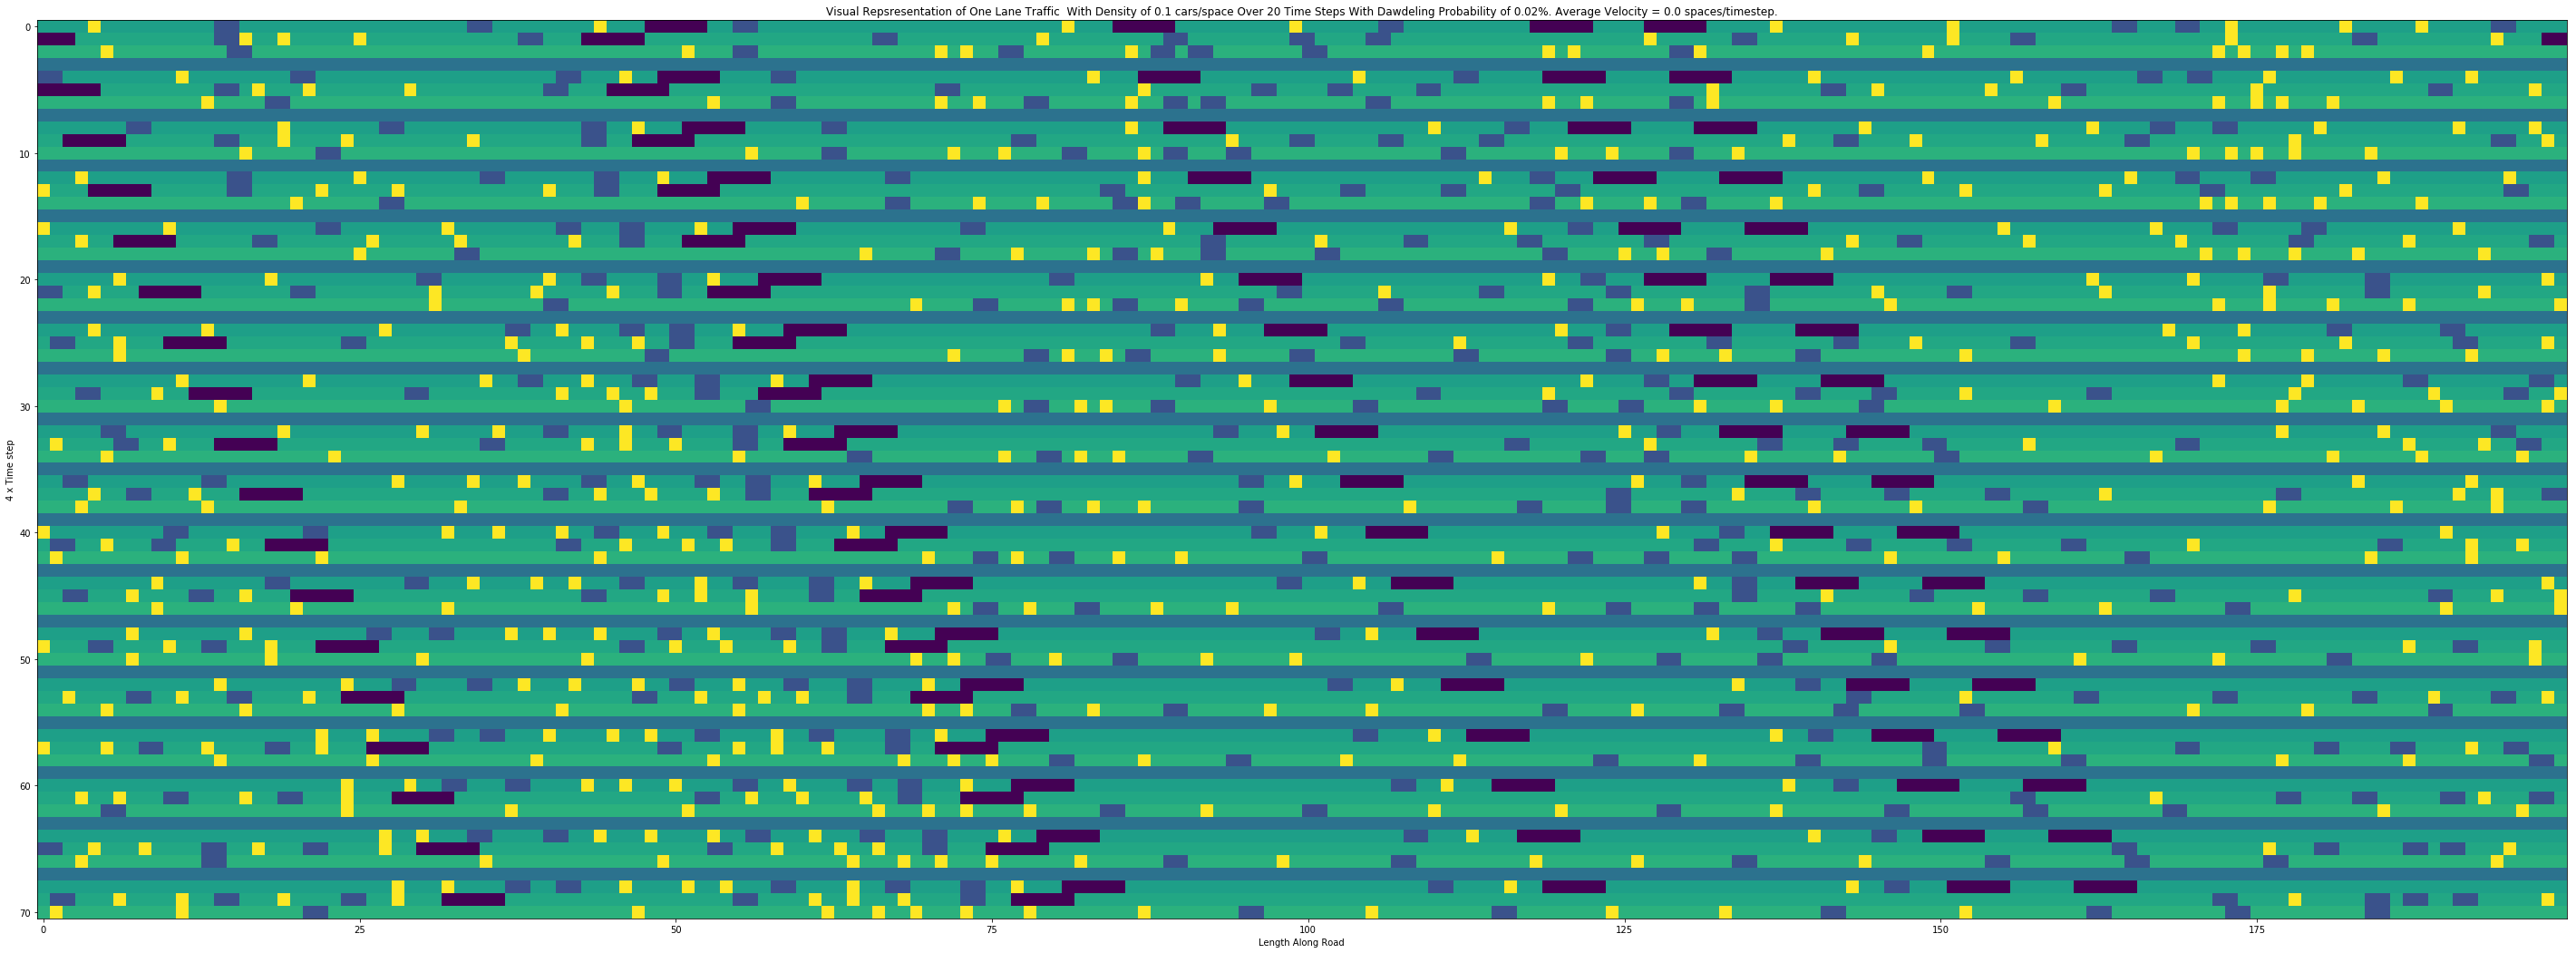

In [154]:
multi_lane_road_periodic_no_lane_change(200, 4, 10, 16, 10/100, 0.2, 0.3, 2/100, 20)

When implemented with 3 lanes without the overtaking rules all worked fine. However when adding the overtaking rules that worked before but now altering them for the larger vehicle size it again breaks down.<br>

Attempted this, however it does seem to work:<br>

        count6=1
        while abs(middlelane[i]-leftlane[i-count6])<tol:
            middlelane = np.delete(middlelane, i-count6) 
            middlelane = np.insert(middlelane, i-count6, middlelane[i]) 

            leftlane = np.delete(leftlane, i-count6) 
            leftlane = np.insert(leftlane, i-count6, 0) 
            count6+=1 
            

In [104]:
def multi_lane_road_periodic_lane_change_vis(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling
        blockage = fraction of the road at which the lane closure occurs
        max_iterations = number of timesteps
    ''' 
    #Create empty road and matrix to store iterations
    tripleroad = np.zeros((3,n), dtype = complex)                         
    matrix = np.zeros((4*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    tol = 1e-4
    iterations = 0
    
    #road closure
    #tripleroad[0, int(n*0.6):int(n)] = 1+2j
    
    ### Car Generation ###
    for j in range(3):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while sum(tripleroad[j,ranspace-4:ranspace+1])>0:
                ranspace = np.random.randint(0, n)
            if np.random.randint(1, 100)<percent_lorries*100 and j<3-1:  
                tripleroad[j, ranspace- 4:ranspace+1]=np.random.randint(2, vmax_lorries) -1j
            elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes*100:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j
            else:
                tripleroad[j, ranspace-1:ranspace+1]=np.random.randint(2, vmax_cars)
    
    while iterations in range(max_iterations):
        
        ##create loop like extention to the end of the road
        leftlane = np.concatenate((tripleroad[0,], tripleroad[0,]))
        middlelane = np.concatenate((tripleroad[1,], tripleroad[1,]))
        rightlane = np.concatenate((tripleroad[2,], tripleroad[2,]))
        
        for i in range(n-vmax_bikes, -1, -1):
            
            #setting the max speed depending on vehicle type
            if leftlane[i].imag == -1:
                vmax = vmax_lorries
                comp = leftlane[i].imag*1j
                t= 4
            elif leftlane[i].imag == 1:
                vmax = vmax_bikes
                comp = leftlane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = leftlane[i].imag*1j
                t=1
                
            #for the middle lane
            if middlelane[i].imag == -1:
                vmax = vmax_lorries
                comp = middlelane[i].imag*1j
                t=4
            elif middlelane[i].imag == 1:
                vmax = vmax_bikes
                comp = middlelane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = middlelane[i].imag*1j
                t=1
                
            #for the right lane
            if rightlane[i].imag == -1:
                vmax = vmax_lorries
                comp = rightlane[i].imag*1j
                t=4
            elif rightlane[i].imag == 1:
                vmax = vmax_bikes
                comp = rightlane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = rightlane[i].imag*1j 
                t=1
                
                
            ### Overtaking ###
        
            #cars in the left lane, and not rear part of vehicle:
            if leftlane[i].real>1 and abs(leftlane[i]- leftlane[i+1])>tol:
                #space in the middle lane for it to move forward into
                if sum(middlelane[i-t:i+1].real)<tol:
                    # are there cars in front?
                    if sum(leftlane[i+1:i+int(leftlane[i].real)].real)<tol:
                        #is it worth overtaking, the cars ahead:
                        count1 = 0    #Count is the distance between two cars.
                        while leftlane[i + count1+1].real<1 and count1<vmax:
                            count1+=1
                        #if the velocity of the car is greater than the distance between
                        if leftlane[i].real>count1: 
                            #if the speed of the car is smaller than its max
                            if leftlane[i].real<vmax: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the middle lane wont have to slow down
                                    count2 = 0 
                                    while middlelane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if middlelane[[i - count2-1]].real<count:
                                        #ensuring the car won't have to slow down in the middle lane
                                        count3 = 0 
                                        while middlelane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if leftlane[i].real<count3:
                                            #move into the middle lane
                                            middlelane[i-t:i] = leftlane[i]
                                            leftlane[i-t:i] = 0
                                                
                                         #if the cars that are in front are faster
                                        elif leftlane[i].real<middlelane[i + count3+1].real:
     
                                            #move into the middle lane
                                            middlelane[i-t:i] = leftlane[i]
                                            leftlane[i-t:i] = 0
    
            ### Moving to the slower lane ###
    
            #cars in the right lane not rear part of vehicle
            if rightlane[i].real>1 and abs(rightlane[i]-rightlane[i+1])>tol:
                #space in the middle lane for it to move forward into
                if sum(middlelane[i-t:i].real)<tol:
            
                    #if cars in the middle lane ahead are traveling at the same speed or faster
                    count4=0 
                    while middlelane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  rightlane[i].real<=count4:
                        
                        #move into the middle lane
                        middlelane[i-t:i] = rightlane[i]
                        rightlane[i-t:i] = 0
            
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down too much
                    elif 1.5*rightlane[i].real<=middlelane[i + count4+1].real:
                            
                        #move into the middle lane
                        middlelane[i-t:i] = rightlane[i]
                        rightlane[i-t:i] = 0
                        
                        
            ### cars in the middle lane can overtake or go into the slower lane
            ### Overtaking ###
        
            #cars in the middle lane:
            if middlelane[i].real>1 and abs(middlelane[i]-middlelane[i+1])>tol:
                #space in the right lane for it to move forward into
                if sum(rightlane[i-t:i].real)<tol:
                    # are there cars in front?
                    if sum(middlelane[i+1:i+int(middlelane[i].real)].real)>tol:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while middlelane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  middlelane[i].real>count: 
                            #if the speed of the car is smaller than its max
                            if middlelane[i].real<vmax: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the right lane wont have to slow down
                                    count2 = 0 
                                    while rightlane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if rightlane[[i - count2-1]].real<count:
                                        #ensuring the car won't have to slow down in the right lane
                                        count3 = 0 
                                        while rightlane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  middlelane[i].real<count3:
                                            #move into the right lane
                                            rightlane[i-t:i] = middlelane[i]
                                            middlelane[i-t:i] = 0

                                        #if the cars that are in front are faster
                                        elif middlelane[i].real<rightlane[i + count3+1].real:
     
                                            #move into the right lane
                                            rightlane[i-t:i] = middlelane[i]
                                            middlelane[i-t:i] = 0
                                                
            ### Moving to the slower lane ###
    
                #space in the left lane for it to move forward into
                if sum(leftlane[i-t:i].real)<tol and abs(middlelane[i]-middlelane[i+1])>tol:
            
                    #if cars in the left lane ahead are traveling at the same speed or faster
                    count4=0 
                    while leftlane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  middlelane[i].real<=count4:
                    
                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, middlelane[i])                                          
                                                                  
                        middlelane = np.delete(leftlane, i)
                        middlelane = np.insert(middlelane, i, 0)
                        
                        #move into the left lane
                        leftlane[i-t:i] = middlelane[i]
                        middlelane[i-t:i] = 0

                        
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down too much
                    elif 1.5*middlelane[i].real<=leftlane[i + count4+1].real:
                        
                        #move into the left lane
                        leftlane[i-t:i] = middlelane[i]
                        middlelane[i-t:i] = 0
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        tripleroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        tripleroad[1,] = np.concatenate((middlelane[n:n+int(n/2)], middlelane[int(n/2):n]))
        tripleroad[2,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))

        
        for j in range(3):
            
            ##create loop like extention to the end of the road
            road = np.concatenate((tripleroad[j,], tripleroad[j,]))
        
        
            #iterate along the road
            for i in range(2*(n-vmax_bikes),  -1, -1):

                #save the complex part to add on when any changes to the velocity are made
                comp = road[i].imag*1j


                #setting the max speed depending on vehicle type
                if road[i].imag == -1:
                    vmax = vmax_lorries
                    t=4
                elif road[i].imag == 1:
                    vmax = vmax_bikes
                    t=0
                else:
                    vmax = vmax_cars
                    t=1


                ### Rule 1 ###
                # If the velocity v of the car is lower than vmax , and the distance to the next car or blockage
                # ahead is larger than v + 1, the speed is increased by one.
                if road[i].real>0 and abs(road[i].imag-2)>tol and road[i]!=road[i+1]: 
                    #if there are no cars in front
                    if sum(road[i+1:i+int(road[i].real)].real)<tol and road[i].real<vmax:
                        road[i-t:i+1]+=1

                    ### Rule 2###

                    # If a driver at site i sees the next vehicle or blockage at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        #If there is a car directly in front slow to stationary.
                        while road[i + count5].real<tol and count5<vmax:
                             #Count is the distance between two cars.
                            count5+=1
                        road[i-t:i+1]=count5 + comp

            ### Rule 4 ###

            # Each vehicle is advanced by v sites.
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-vmax_bikes, -1, -1): 

                #cars move forward 
                if road[i].real>0  and road[i]!=road[i+1]:        
                    road= np.insert(road, i+int(road[i].real)-1, road[i])
                    road = np.delete(road, i)




            #reduce the road back to the original shape
            i=0
            while abs(road[int(n/2)+i])<tol and abs(road[int(n/2)+i-1])<tol:
                i-=1
            tripleroad[j,] = np.roll(np.concatenate((road[n+i:n+int(n/2)+i], road[int(n/2)+i:n+i])), i)


        #Visualisation
        for j in range(3):
            for i in range(n):
                if tripleroad[j, i]==0:
                    matrix[4*(iterations-1) +j,i]= 15+3*j 
                elif tripleroad[j, i].imag == -1:
                    matrix[4*(iterations-1) +j,i]= -30 #-30*j
                elif tripleroad[j, i].imag == 1:
                    matrix[4*(iterations-1) +j,i]= 50 #-30*j
                elif tripleroad[j, i].imag == 2:
                    matrix[4*(iterations-1) +j,i]= -50 #-30*j
                else:
                    matrix[4*(iterations-1) +j,i]= -10 #+30*j


       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
            #    #if tripleroad[j,i]==0:
            #    street.append(road[i])
            #    else:
            #        street.append(tripleroad[j,i]-1)
            #print(iterations, street)
        #print(road)
       # print("")

            ### Data collection ###

            #data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)


        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)

        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('4 x Time step')
    ax11.set_title("Visual Repsresentation of One Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix) 
             






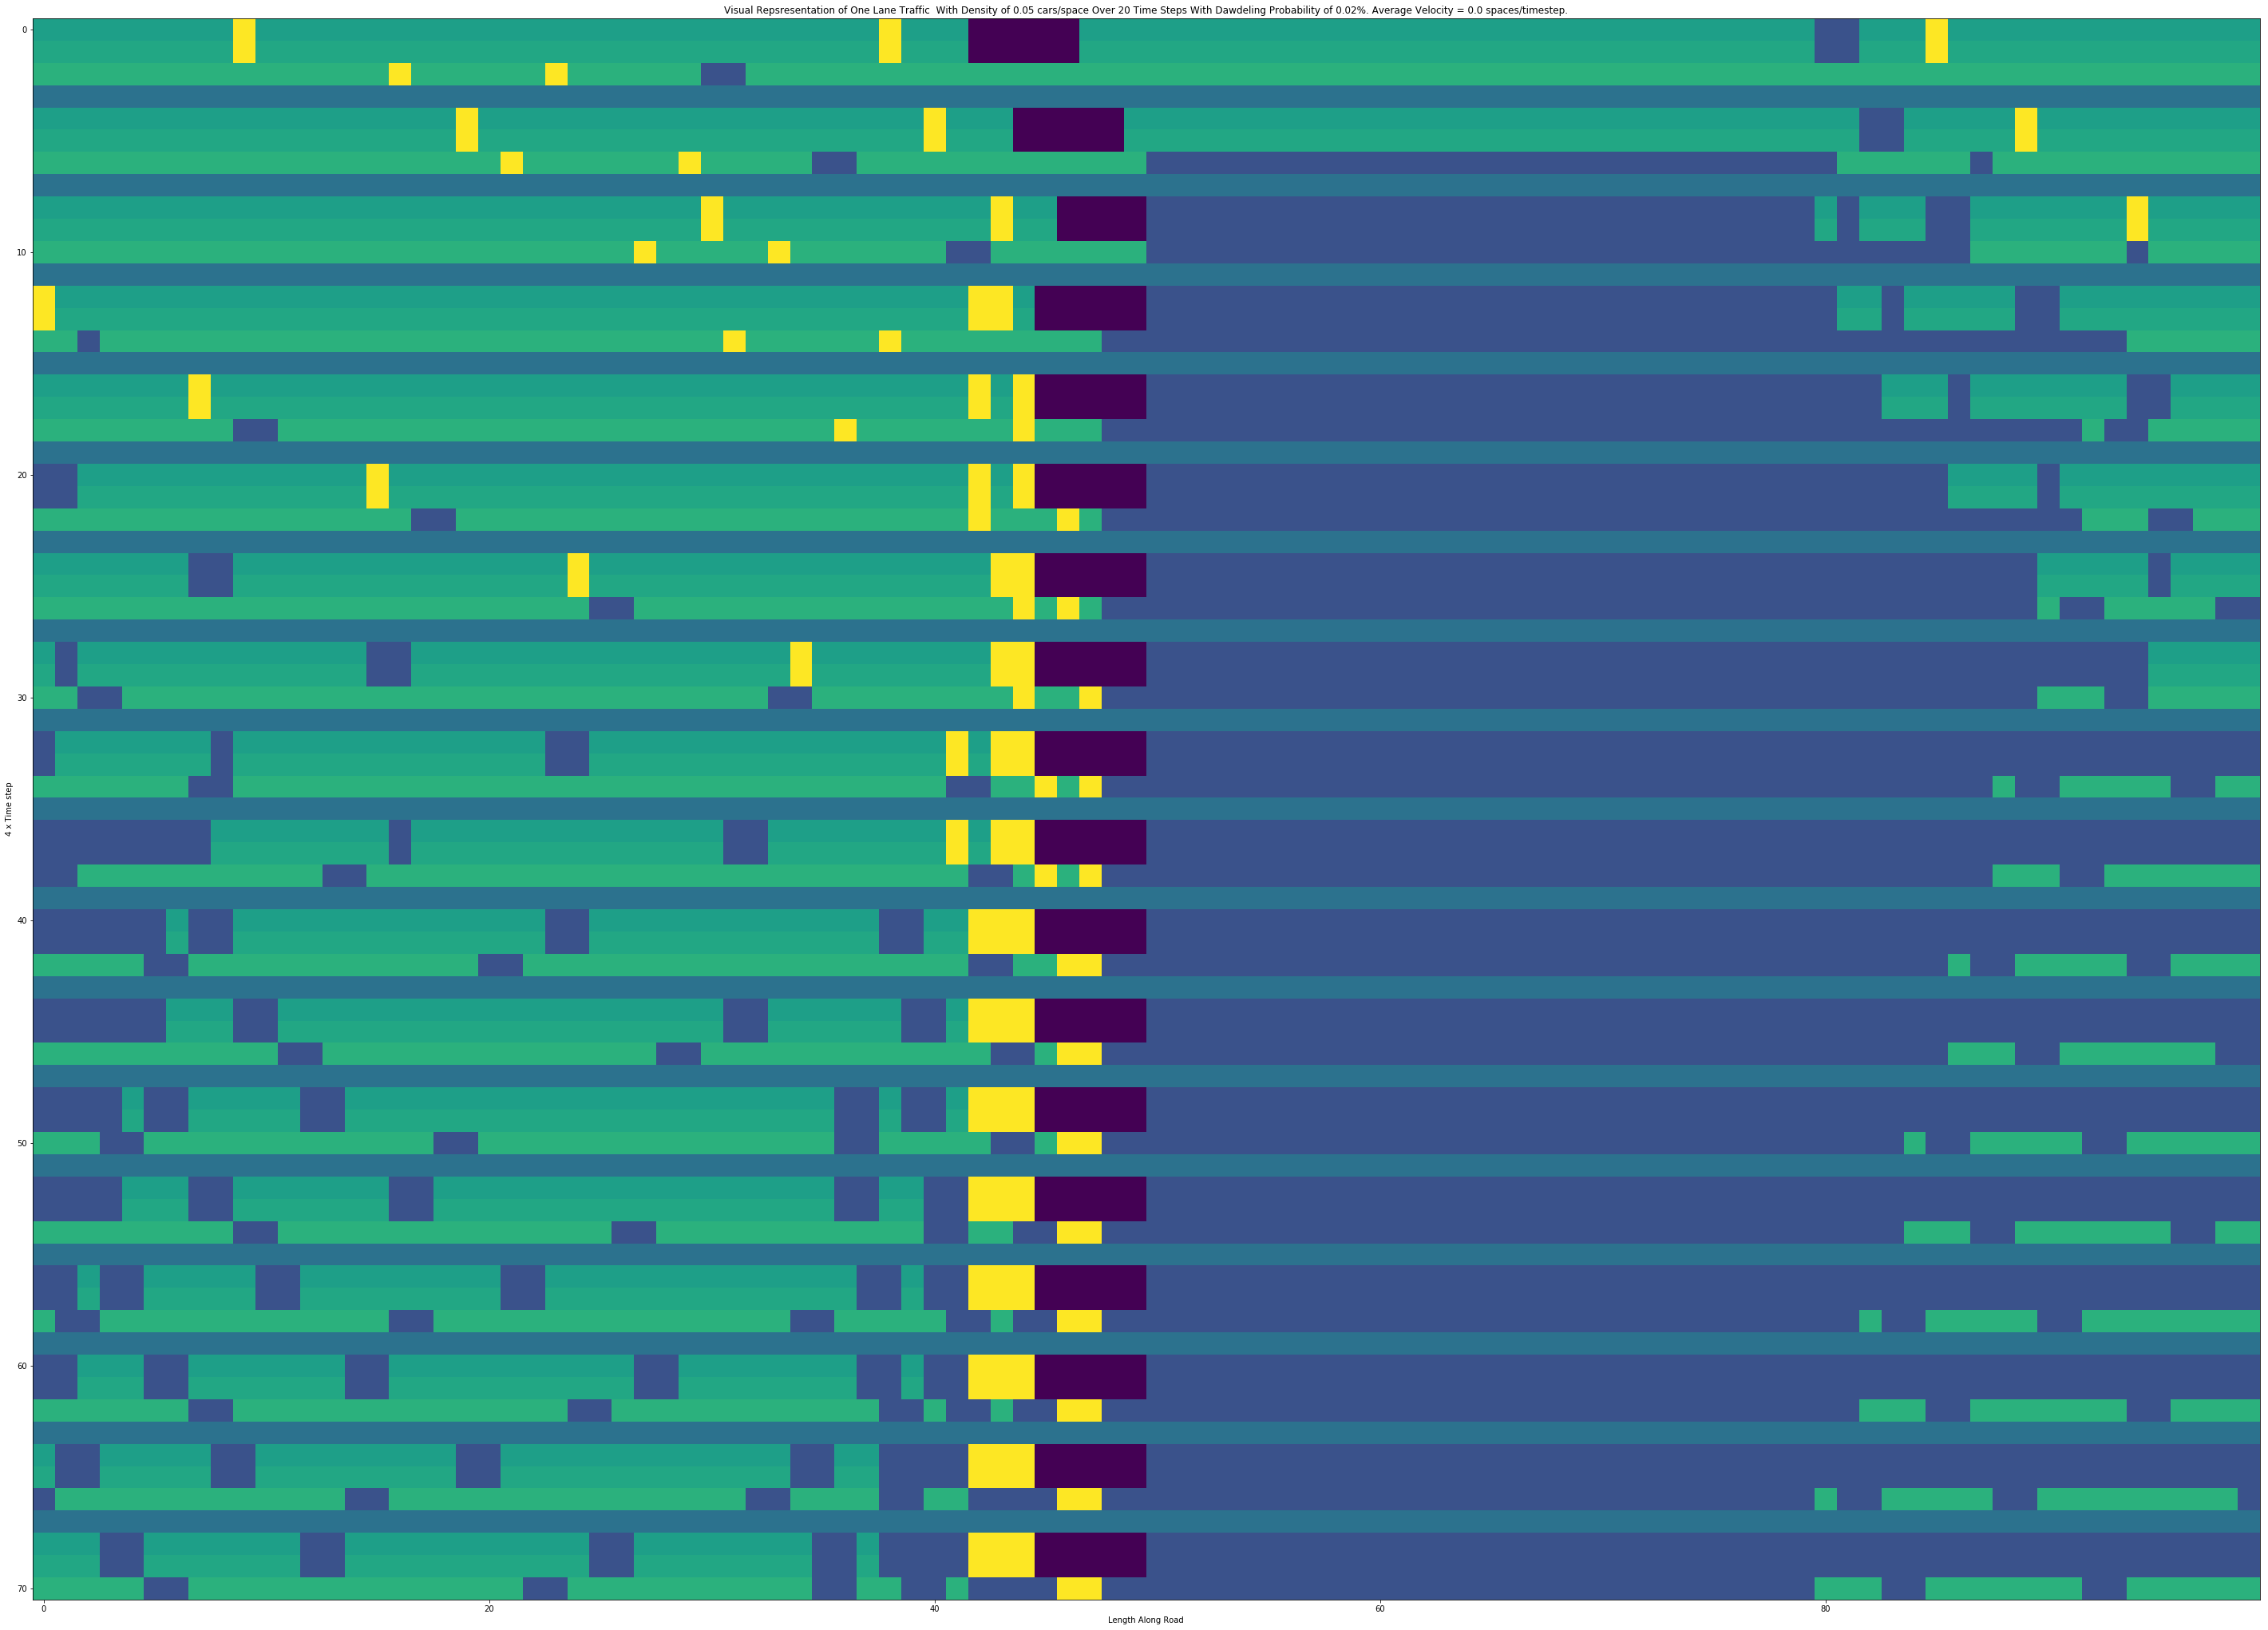

In [176]:
multi_lane_road_periodic_lane_change_vis(100, 4, 10, 16, 5/100, 0.3, 0.3, 2/100, 20)

In [157]:
def multi_lane_road_periodic_lane_change_vis(n, vmax_lorries, vmax_cars, vmax_bikes, density, percent_lorries, percent_bikes, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling
        blockage = fraction of the road at which the lane closure occurs
        max_iterations = number of timesteps
    ''' 
    #Create empty road and matrix to store iterations
    tripleroad = np.zeros((3,n), dtype = complex)                         
    matrix = np.zeros((4*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    tol = 1e-4
    iterations = 0
    
    #road closure
    #tripleroad[0, int(n*0.6):int(n)] = 1+2j
    
    ### Car Generation ###
    for j in range(3):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while sum(tripleroad[j,ranspace-4:ranspace+1])>0:
                ranspace = np.random.randint(0, n)
            if np.random.randint(1, 100)<percent_lorries*100 and j<3-1:  
                tripleroad[j, ranspace- 4:ranspace+1]=np.random.randint(2, vmax_lorries) -1j
            elif np.random.randint(1, (1-percent_lorries)*100)<percent_bikes*100:
                tripleroad[j, ranspace]=np.random.randint(2, vmax_bikes) +1j
            else:
                tripleroad[j, ranspace-1:ranspace+1]=np.random.randint(2, vmax_cars)
    
    while iterations in range(max_iterations):
        
        ##create loop like extention to the end of the road
        leftlane = np.concatenate((tripleroad[0,], tripleroad[0,]))
        middlelane = np.concatenate((tripleroad[1,], tripleroad[1,]))
        rightlane = np.concatenate((tripleroad[2,], tripleroad[2,]))
        
        for i in range(n-vmax_bikes, -1, -1):
            
            #setting the max speed depending on vehicle type
            if leftlane[i].imag == -1:
                vmax = vmax_lorries
                comp = leftlane[i].imag*1j
                t= 4
            elif leftlane[i].imag == 1:
                vmax = vmax_bikes
                comp = leftlane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = leftlane[i].imag*1j
                t=1
                
            #for the middle lane
            if middlelane[i].imag == -1:
                vmax = vmax_lorries
                comp = middlelane[i].imag*1j
                t=4
            elif middlelane[i].imag == 1:
                vmax = vmax_bikes
                comp = middlelane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = middlelane[i].imag*1j
                t=1
                
            #for the right lane
            if rightlane[i].imag == -1:
                vmax = vmax_lorries
                comp = rightlane[i].imag*1j
                t=4
            elif rightlane[i].imag == 1:
                vmax = vmax_bikes
                comp = rightlane[i].imag*1j
                t=0
            else:
                vmax = vmax_cars
                comp = rightlane[i].imag*1j 
                t=1
  
            ### Overtaking ###
        
            #cars in the left lane, and not rear part of vehicle:
            if leftlane[i].real>1 and abs(leftlane[i]- leftlane[i+1])>tol:
                #space in the middle lane for it to move forward into
                if sum(middlelane[i-t:i+1].real)<tol:
                    # are there cars in front?
                    if sum(leftlane[i+1:i+int(leftlane[i].real)].real)<tol:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while leftlane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if leftlane[i].real>count: 
                            #if the speed of the car is smaller than its max
                            if leftlane[i].real<vmax: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the middle lane wont have to slow down
                                    count2 = 0 
                                    while middlelane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if middlelane[[i - count2-1]].real<count:
                                        #ensuring the car won't have to slow down in the middle lane
                                        count3 = 0 
                                        while middlelane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if leftlane[i].real<count3:
                                            #move into the middle lane

                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])

                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                                                
                                            count6=1
                                            while abs(middlelane[i]-leftlane[i-count6])<tol:
                                                middlelane = np.delete(middlelane, i-count6)
                                                middlelane = np.insert(middlelane, i-count6, middlelane[i])
                                                                  
                                                leftlane = np.delete(leftlane, i-count6)
                                                leftlane = np.insert(leftlane, i-count6, 0)
                                                count6+=1
                                                
                                         #if the cars that are in front are faster
                                        elif leftlane[i].real<middlelane[i + count3+1].real:
     
                                            #move into the middle lane

                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, leftlane[i])

                                            leftlane = np.delete(leftlane, i)
                                            leftlane = np.insert(leftlane, i, 0)
                            
                                            count6=1
                                            while abs(middlelane[i]-leftlane[i-count6])<tol:
                                                middlelane = np.delete(middlelane, i-count6)
                                                middlelane = np.insert(middlelane, i-count6, middlelane[i])
                                                                  
                                                leftlane = np.delete(leftlane, i-count6)
                                                leftlane = np.insert(leftlane, i-count6, 0)
                                                count6+=1
    
            ### Moving to the slower lane ###
    
            #cars in the right lane not rear part of vehicle
            if rightlane[i].real>1 and abs(rightlane[i]-rightlane[i+1])>tol:
                #space in the middle lane for it to move forward into
                if sum(middlelane[i-t:i+1].real)<tol:
            
                    #if cars in the middle lane ahead are traveling at the same speed or faster
                    count4=0 
                    while middlelane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  rightlane[i].real<=count4:
                        
                        #move into the middle lane
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, rightlane[i])

                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                        count6=1
                        while abs(middlelane[i]-rightlane[i-count6])<tol:
                            middlelane = np.delete(middlelane, i-count6)
                            middlelane = np.insert(middlelane, i-count6, middlelane[i])

                            rightlane = np.delete(rightlane, i-count6)
                            rightlane = np.insert(rightlane, i-count6, 0)
                            count6+=1
            
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down too much
                    elif 1*rightlane[i].real<=middlelane[i + count4+1].real:
                            
                        #move into the middle lane
                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, rightlane[i])

                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                        count6=1
                        while abs(middlelane[i]-rightlane[i-count6])<tol:
                            middlelane = np.delete(middlelane, i-count6)
                            middlelane = np.insert(middlelane, i-count6, middlelane[i])

                            rightlane = np.delete(rightlane, i-count6)
                            rightlane = np.insert(rightlane, i-count6, 0)
                            count6+=1
                        
                        
            ### cars in the middle lane can overtake or go into the slower lane
            ### Overtaking ###
        
            #cars in the middle lane:
            if middlelane[i].real>1 and abs(middlelane[i]-middlelane[i+1])>tol:
                #space in the right lane for it to move forward into
                if sum(rightlane[i-t:i].real)<tol:
                    # are there cars in front?
                    if sum(middlelane[i+1:i+int(middlelane[i].real)].real)>tol:
                        #is it worth overtaking, the cars ahead:
                        count = 0    #Count is the distance between two cars.
                        while middlelane[i + count+1].real<1 and count<vmax:
                            count+=1
                        #if the velocity of the car is greater than the distance between
                        if  middlelane[i].real>count: 
                            #if the speed of the car is smaller than its max
                            if middlelane[i].real<vmax: 
                                #ensure we stay within index- this will not matter when we move to periodic system
                                if i-vmax>0:
                                    #ensuring the car behind in the right lane wont have to slow down
                                    count2 = 0 
                                    while rightlane[i - count2 - 1].real<1 and count2<vmax:
                                        count2+=1
                                    #if the speed (1 timestep) of car behind is smaller than the distance
                                    if rightlane[[i - count2-1]].real<count:
                                        #ensuring the car won't have to slow down in the right lane
                                        count3 = 0 
                                        while rightlane[i + count3+1].real<1 and count3<=vmax:
                                            count3+=1
                                        #no cars infront at distance equivalent to that will be travelled in one time step.
                                        if  middlelane[i].real<count3:
                                            #move into the right lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, middlelane[i])
                                                                  
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, 0)
                                            
                                            count6=1
                                            while abs(rightlane[i]-middlelane[i-count6])<tol:
                                                rightlane = np.delete(rightlane, i-count6)
                                                rightlane = np.insert(rightlane, i-count6, rightlane[i])

                                                middlelane = np.delete(middlelane, i-count6)
                                                middlelane = np.insert(middlelane, i-count6, 0)
                                                count6+=1

                                        #if the cars that are in front are faster
                                        elif middlelane[i].real<rightlane[i + count3+1].real:
     
                                            #move into the right lane
                                            rightlane = np.delete(rightlane, i)
                                            rightlane = np.insert(rightlane, i, middlelane[i])
                                                                  
                                            middlelane = np.delete(middlelane, i)
                                            middlelane = np.insert(middlelane, i, 0)
                                            
                                            count6=1
                                            while abs(rightlane[i]-middlelane[i-count6])<tol:
                                                rightlane = np.delete(rightlane, i-count6)
                                                rightlane = np.insert(rightlane, i-count6, rightlane[i])

                                                middlelane = np.delete(middlelane, i-count6)
                                                middlelane = np.insert(middlelane, i-count6, 0)
                                                count6+=1
                
                ### Moving to the slower lane ###
    
                #space in the left lane for it to move forward into
                if sum(leftlane[i-t:i+1].real)<tol and abs(middlelane[i]-middlelane[i+1])>tol:
            
                    #if cars in the left lane ahead are traveling at the same speed or faster
                    count4=0 
                    while leftlane[i + count4+1].real<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  middlelane[i].real<=count4:
                    
                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, leftlane[i])                                          
                                                                  
                        middlelane = np.delete(leftlane, i)
                        middlelane = np.insert(middlelane, i, 0)
                        
                        count6=1
                        while abs(leftlane[i]-middlelane[i-count6])<tol and count6<6:
                            leftlane = np.delete(leftlane, i-count6)
                            leftlane = np.insert(leftlane, i-count6, leftlane[i])

                            middlelane = np.delete(middlelane, i-count6)
                            middlelane = np.insert(middlelane, i-count6, 0)
                            count6+=1

                        
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down too much
                    elif 1.5*middlelane[i].real<=leftlane[i + count4+1].real:
                        
                        #move into the left lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, middlelane[i])

                        middlelane = np.delete(middlelane, i)
                        middlelane = np.insert(middlelane, i, 0)
                        
                        count6=1
                        while abs(leftlane[i]-middlelane[i-count6])<tol:
                            leftlane = np.delete(leftlane, i-count6)
                            leftlane = np.insert(leftlane, i-count6, leftlane[i])

                            middlelane = np.delete(middlelane, i-count6)
                            middlelane = np.insert(middlelane, i-count6, 0)
                            count6+=1
                            
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        tripleroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        tripleroad[1,] = np.concatenate((middlelane[n:n+int(n/2)], middlelane[int(n/2):n]))
        tripleroad[2,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))

        
        for j in range(3):
            
            ##create loop like extention to the end of the road
            road = np.concatenate((tripleroad[j,], tripleroad[j,]))
        
        
            #iterate along the road
            for i in range(2*(n-vmax_bikes),  -1, -1):

                #save the complex part to add on when any changes to the velocity are made
                comp = road[i].imag*1j


                #setting the max speed depending on vehicle type
                if road[i].imag == -1:
                    vmax = vmax_lorries
                    t=4
                elif road[i].imag == 1:
                    vmax = vmax_bikes
                    t=0
                else:
                    vmax = vmax_cars
                    t=1


                ### Rule 1 ###
                # If the velocity v of the car is lower than vmax , and the distance to the next car or blockage
                # ahead is larger than v + 1, the speed is increased by one.
                if road[i].real>0 and abs(road[i].imag-2)>tol and road[i]!=road[i+1]: 
                    #if there are no cars in front
                    if sum(road[i+1:i+int(road[i].real)].real)<tol and road[i].real<vmax:
                        road[i-t:i+1]+=1

                    ### Rule 2###

                    # If a driver at site i sees the next vehicle or blockage at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        #If there is a car directly in front slow to stationary.
                        while road[i + count5].real<tol and count5<vmax:
                             #Count is the distance between two cars.
                            count5+=1
                        road[i-t:i+1]=count5 + comp

            ### Rule 4 ###

            # Each vehicle is advanced by v sites.
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-vmax_bikes, -1, -1): 

                #cars move forward 
                if road[i].real>0  and road[i]!=road[i+1]:        
                    road= np.insert(road, i+int(road[i].real)-1, road[i])
                    road = np.delete(road, i)




            #reduce the road back to the original shape
            i=0
            while abs(road[int(n/2)+i])<tol and abs(road[int(n/2)+i-1])<tol:
                i-=1
            tripleroad[j,] = np.roll(np.concatenate((road[n+i:n+int(n/2)+i], road[int(n/2)+i:n+i])), i)


        #Visualisation
        for j in range(3):
            for i in range(n):
                if tripleroad[j, i]==0:
                    matrix[4*(iterations-1) +j,i]= 15+3*j 
                elif tripleroad[j, i].imag == -1:
                    matrix[4*(iterations-1) +j,i]= -30 #-30*j
                elif tripleroad[j, i].imag == 1:
                    matrix[4*(iterations-1) +j,i]= 50 #-30*j
                elif tripleroad[j, i].imag == 2:
                    matrix[4*(iterations-1) +j,i]= -50 #-30*j
                else:
                    matrix[4*(iterations-1) +j,i]= -10 #+30*j


       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
            #    #if tripleroad[j,i]==0:
            #    street.append(road[i])
            #    else:
            #        street.append(tripleroad[j,i]-1)
            #print(iterations, street)
        #print(road)
       # print("")

            ### Data collection ###

            #data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)


        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)

        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('4 x Time step')
    ax11.set_title("Visual Repsresentation of One Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix[:-4,]) 



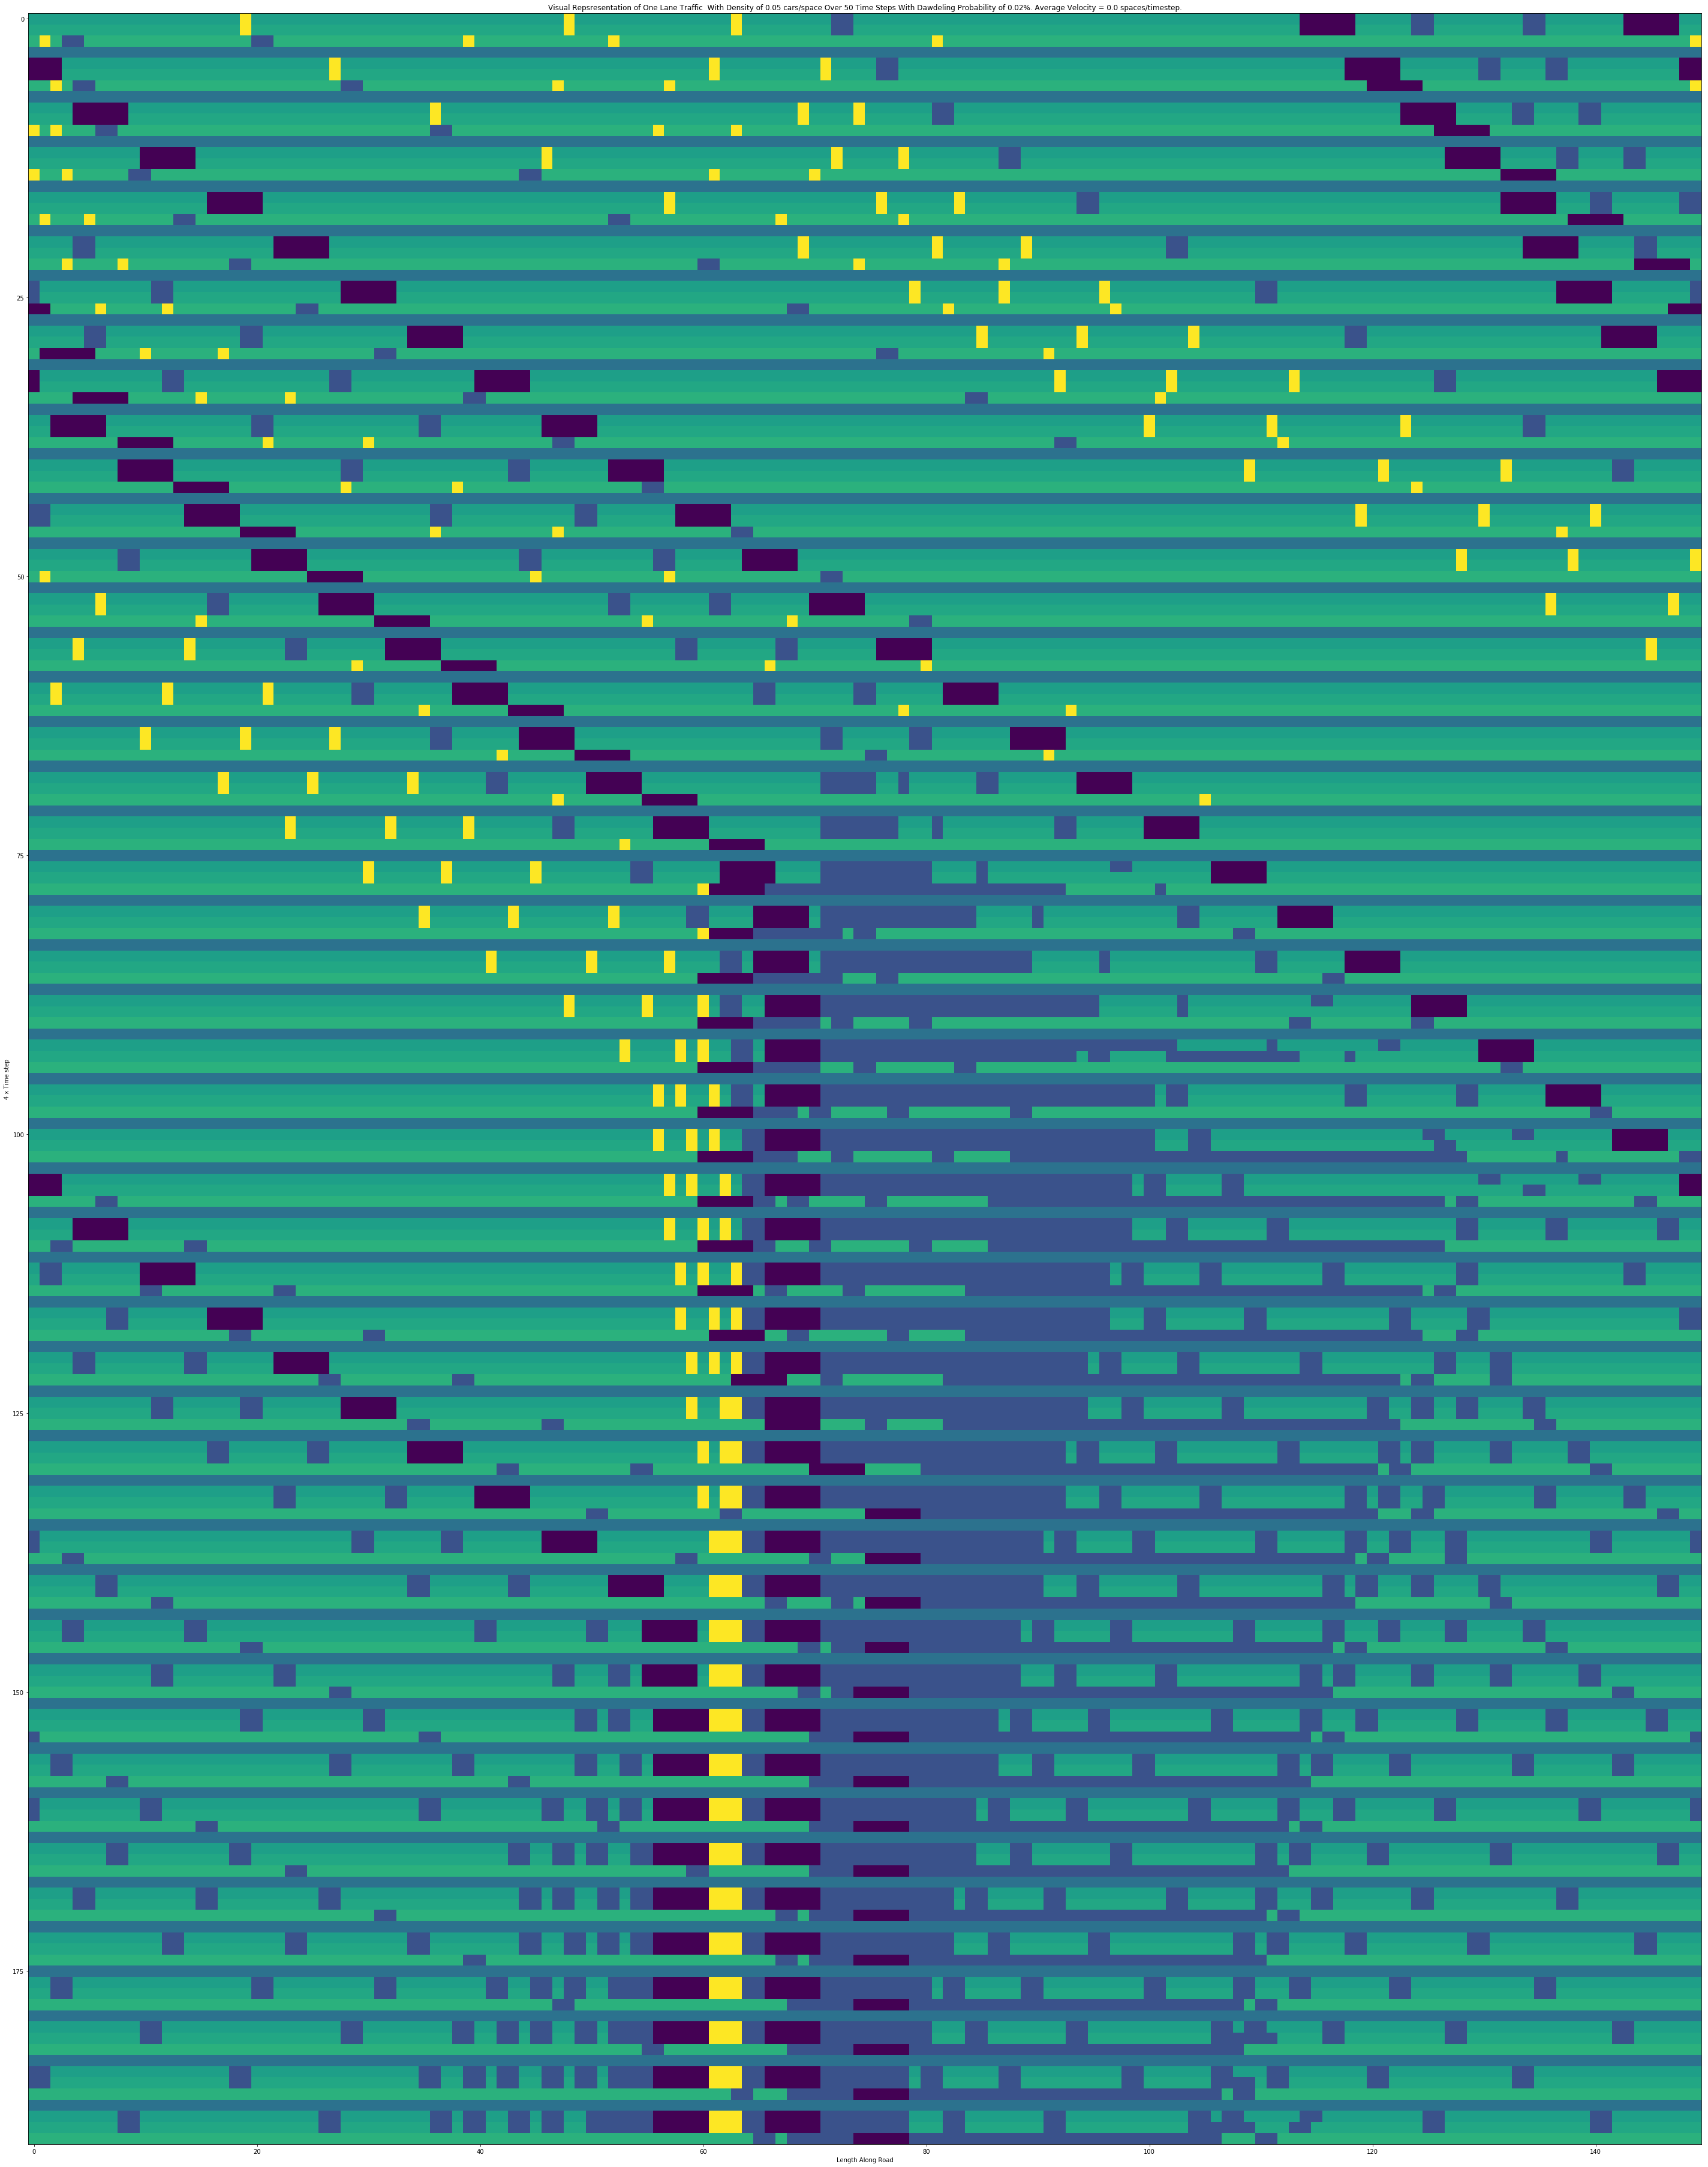

In [149]:
multi_lane_road_periodic_lane_change_vis(150, 8, 10, 16, 5/100, 0.3, 0.3, 2/100, 50)

I was then advised that there was no need to continue to fix this, and so it would be something I would complete as future work.
I then looked to analyse models.